# PART 1: Comparative EDA & Feature Engineering


This section performs a full Exploratory Data Analysis, comparing Mud Pump A and B across multiple dimensions before engineering features for modeling.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (15, 6)
pd.set_option('display.max_columns', None)


## 1.1. Load Data


In [2]:
df_a_original = pd.read_excel('../datasets/PredictiveMaintenanceTestData.xlsx', sheet_name = 'Mud Pump A Data')
df_b_original = pd.read_excel('../datasets/PredictiveMaintenanceTestData.xlsx', sheet_name = 'Mud Pump B Data')

In [3]:
df_a_original.head()

,Datetime,Mud Pump A,React 55 Mud Flow to Mud Pump A,MUD PUMP A SUCTION PRESS,MUD PUMP A SPEED,MUD PUMP A SPEED.1,PUM-34A- Current,Mud pump A speed,MUD PUMP A CYLINDER 2,MUD PUMP A CYLINDER 3,Mud Pump A Cylinder #1 Temperature,Mud Pump A Cylinder #2 Temperature,Mud Pump A Cylinder #3 Temperature,Mud Pump A Cylinder #4 Temperature
0,2024-09-03 00:00:00,RUN,105.130142,387.835968,42.003342,99.395256,262.888275,41.446602,6773.156250,6795.823242,62.210194,52.913517,59.367279,57.872066
1,2024-09-03 01:00:00,RUN,145.442825,434.914001,42.046818,99.322189,268.082886,41.446602,7006.632324,7035.887695,61.636726,51.343925,59.750381,58.145172
2,2024-09-03 02:00:00,RUN,140.586426,424.093658,41.957718,99.467384,265.449982,41.446602,6818.970215,6843.666016,61.427448,52.121159,60.373962,58.975826
3,2024-09-03 03:00:00,RUN,148.379059,423.871460,42.01181,99.364395,270.196472,41.446602,6922.452148,6951.882324,61.100765,49.370907,59.966591,58.109085
4,2024-09-03 04:00:00,RUN,140.214325,425.911072,41.952599,99.500214,269.50528,41.446602,6925.411133,6958.680664,61.523418,50.280827,61.684792,58.280701


In [4]:
df_a_original.columns

Index(['Datetime', 'Mud Pump A', 'React 55 Mud Flow to Mud Pump A',
       'MUD PUMP A SUCTION PRESS', 'MUD PUMP A SPEED', 'MUD PUMP A SPEED.1',
       'PUM-34A- Current', 'Mud pump A speed', 'MUD PUMP A CYLINDER 2',
       'MUD PUMP A CYLINDER 3', 'Mud Pump A Cylinder #1 Temperature',
       'Mud Pump A Cylinder #2 Temperature',
       'Mud Pump A Cylinder #3 Temperature',
       'Mud Pump A Cylinder #4 Temperature'],
      dtype='object')

In [5]:
df_a_original.shape

(8785, 14)

In [6]:
print("\n--- Pump B Original Data Head ---")
df_b_original.head()


--- Pump B Original Data Head ---


,Datetime,Mud Pump B,MUD PUMP B SLEECTED PRESSURE,MUD PUMP B SPEED,MUD PUMP B SPEED.1,Mud Pump B Current,MUD PUMP B SPEED.2,MUD PUMP B CYLINDER 1,MUD PUMP B CYLINDER 3,Mud Pump B Cylinder #1 Temperature,Mud Pump B Cylinder #2 Temperature,Mud Pump B Cylinder #3 Temperature,Mud Pump B Cylinder #4 Temperature
0,2024-09-03 00:00:00,RUN,6803.469238,41.921871,99.169846,32.062214,41.921871,6910.418945,6847.711426,52.751987,48.630867,59.890633,46.249844
1,2024-09-03 01:00:00,RUN,7042.426758,41.877125,99.206169,32.931225,41.877125,7148.238281,7089.485840,50.403271,44.441818,59.483265,44.470661
2,2024-09-03 02:00:00,RUN,6846.342773,42.204556,98.949997,29.462978,42.204556,6954.513672,6895.804688,50.531864,44.115452,59.559067,44.062344
3,2024-09-03 03:00:00,RUN,6943.645020,41.852901,99.228210,31.202473,41.852901,7060.827637,6998.967773,50.742722,44.422279,60.176975,45.222363
4,2024-09-03 04:00:00,RUN,6954.202148,42.289303,98.875153,31.649261,42.289303,7071.473633,7010.396484,51.880516,45.928837,60.759895,45.405792


In [7]:
df_b_original.columns

Index(['Datetime', 'Mud Pump B', 'MUD PUMP B SLEECTED PRESSURE',
       'MUD PUMP B SPEED', 'MUD PUMP B SPEED.1', 'Mud Pump B Current',
       'MUD PUMP B SPEED.2', 'MUD PUMP B CYLINDER 1', 'MUD PUMP B CYLINDER 3',
       'Mud Pump B Cylinder #1 Temperature',
       'Mud Pump B Cylinder #2 Temperature',
       'Mud Pump B Cylinder #3 Temperature',
       'Mud Pump B Cylinder #4 Temperature'],
      dtype='object')

## 1.2. Standardize Columns


In [8]:
def standardize_columns(df, pump_prefix):
    df_clean = df.copy()
    mapping = {'MUD PUMP A SUCTION PRESS': 'Suction Pressure', 'MUD PUMP B SLEECTED PRESSURE': 'Suction Pressure', 'PUM-34A- Current': 'Current', 'Mud Pump B Current': 'Current'}
    df_clean.rename(columns=mapping, inplace=True)
    new_cols = []
    for col in df_clean.columns:
        new_name = col
        prefixes = [f"MUD PUMP {pump_prefix} ", f"Mud Pump {pump_prefix} ", f"Mud pump {pump_prefix} "]
        for p in prefixes:
            if new_name.upper().startswith(p.upper()): new_name = new_name[len(p):]
        new_name = new_name.replace("Cylinder #", "Cylinder ").replace("CYLINDER ", "Cylinder ").strip()
        new_cols.append(new_name)
    df_clean.columns = new_cols
    df_clean = df_clean.loc[:, ~df_clean.columns.duplicated()]
    df_clean['Pump'] = f'Pump {pump_prefix}'
    return df_clean

df_a_clean = standardize_columns(df_a_original, 'A')
df_b_clean = standardize_columns(df_b_original, 'B')
common_cols = sorted(list(set(df_a_clean.columns) & set(df_b_clean.columns)))
df_combined = pd.concat([df_a_clean[common_cols], df_b_clean[common_cols]], ignore_index=True)

print("--- Combined Data Head (for EDA) ---")
df_combined.head()

--- Combined Data Head (for EDA) ---


,Current,Cylinder 1 Temperature,Cylinder 2 Temperature,Cylinder 3,Cylinder 3 Temperature,Cylinder 4 Temperature,Datetime,Pump,SPEED,SPEED.1,Suction Pressure
0,262.888275,62.210194,52.913517,6795.823242,59.367279,57.872066,2024-09-03 00:00:00,Pump A,42.003342,99.395256,387.835968
1,268.082886,61.636726,51.343925,7035.887695,59.750381,58.145172,2024-09-03 01:00:00,Pump A,42.046818,99.322189,434.914001
2,265.449982,61.427448,52.121159,6843.666016,60.373962,58.975826,2024-09-03 02:00:00,Pump A,41.957718,99.467384,424.093658
3,270.196472,61.100765,49.370907,6951.882324,59.966591,58.109085,2024-09-03 03:00:00,Pump A,42.01181,99.364395,423.871460
4,269.50528,61.523418,50.280827,6958.680664,61.684792,58.280701,2024-09-03 04:00:00,Pump A,41.952599,99.500214,425.911072


## 1.3. EDA: Comparative Statistics


In [9]:
df_combined.shape

(17570, 11)

In [10]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17570 entries, 0 to 17569
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Current                 17570 non-null  object        
 1   Cylinder 1 Temperature  17570 non-null  float64       
 2   Cylinder 2 Temperature  17570 non-null  float64       
 3   Cylinder 3              17570 non-null  float64       
 4   Cylinder 3 Temperature  17570 non-null  float64       
 5   Cylinder 4 Temperature  17570 non-null  float64       
 6   Datetime                17570 non-null  datetime64[ns]
 7   Pump                    17570 non-null  object        
 8   SPEED                   17570 non-null  object        
 9   SPEED.1                 17570 non-null  float64       
 10  Suction Pressure        17570 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(3)
memory usage: 1.5+ MB


In [11]:
numeric_cols = df_combined.select_dtypes(include=[np.number]).columns.tolist()
stats = df_combined.groupby('Pump')[numeric_cols].describe().T
stats

Pump                               Pump A       Pump B
Cylinder 1 Temperature count  8785.000000  8785.000000
                       mean     49.774707    39.722013
                       std      17.329241    16.687431
                       min       3.518027     3.739599
                       25%      52.710541    19.497616
                       50%      57.756870    48.518661
                       75%      59.865734    52.184189
                       max      86.098862    77.710686
Cylinder 2 Temperature count  8785.000000  8785.000000
                       mean     46.389437    36.546890
                       std      16.075908    14.915996
                       min       3.564990     3.082451
                       25%      46.489536    19.191565
                       50%      52.593609    44.064548
                       75%      57.202473    47.705025
                       max      85.476067    78.074097
Cylinder 3             count  8785.000000  8785.000000
                       mean   4922.955773  4275.195890
                       std    2661.930507  3023.319795
                       min     -22.754631   -65.440628
                       25%    4171.517578    20.601536
                       50%    6202.852051  5806.588867
                       75%    6834.949219  6845.026367
                       max    8492.531250  8350.686523
Cylinder 3 Temperature count  8785.000000  8785.000000
                       mean     46.677733    38.637283
                       std      15.974350    16.395659
                       min       4.229860     3.994974
                       25%      48.865356    19.070850
                       50%      53.181263    47.338627
                       75%      56.318272    50.348274
                       max      88.497849    75.078949
Cylinder 4 Temperature count  8785.000000  8785.000000
                       mean     45.255134    35.709993
                       std      15.346967    15.083391
                       min       3.857160     3.914844
                       25%      47.494957    18.786875
                       50%      52.109497    41.620651
                       75%      54.557175    47.338158
                       max      82.536400    64.555603
SPEED.1                count  8785.000000  8785.000000
                       mean     91.024937    61.967651
                       std      21.741331    46.418272
                       min      -5.000000    -5.000000
                       25%      94.871910    -5.000000
                       50%      99.378395    91.502068
                       75%      99.727692    99.053329
                       max     100.000000   100.000000
Suction Pressure       count  8785.000000  8785.000000
                       mean    339.738328  4923.025164
                       std     185.737529  2661.848594
                       min      -2.811020   -22.500910
                       25%     280.442993  4174.153320
                       50%     394.053528  6201.748047
                       75%     466.415039  6835.129883
                       max     629.897827  8572.171875

## 1.4. EDA: Distribution Plots


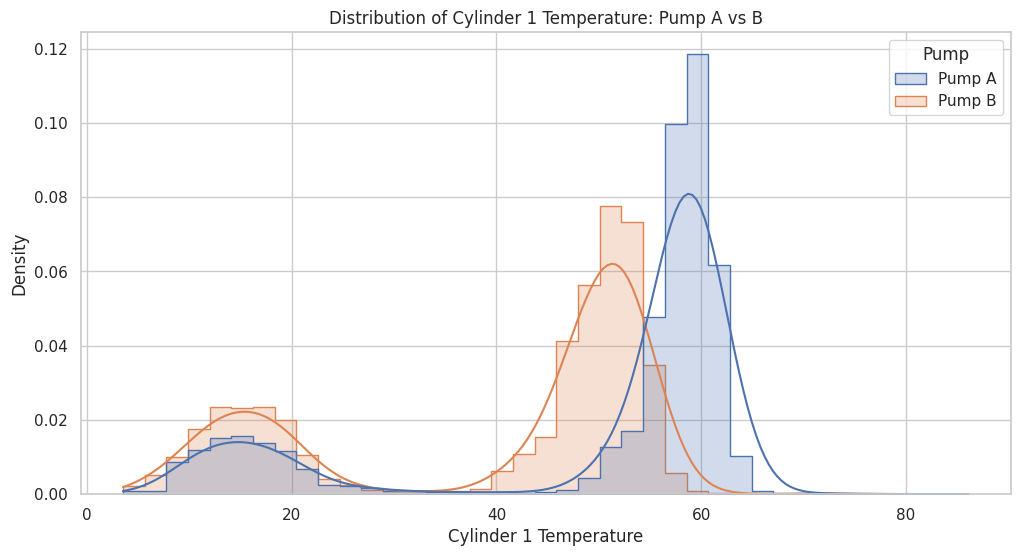

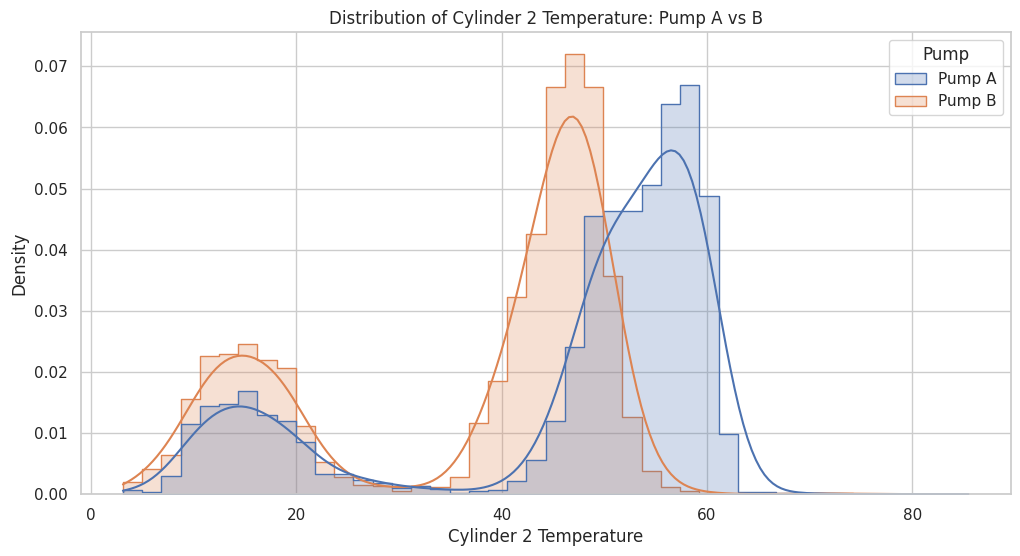

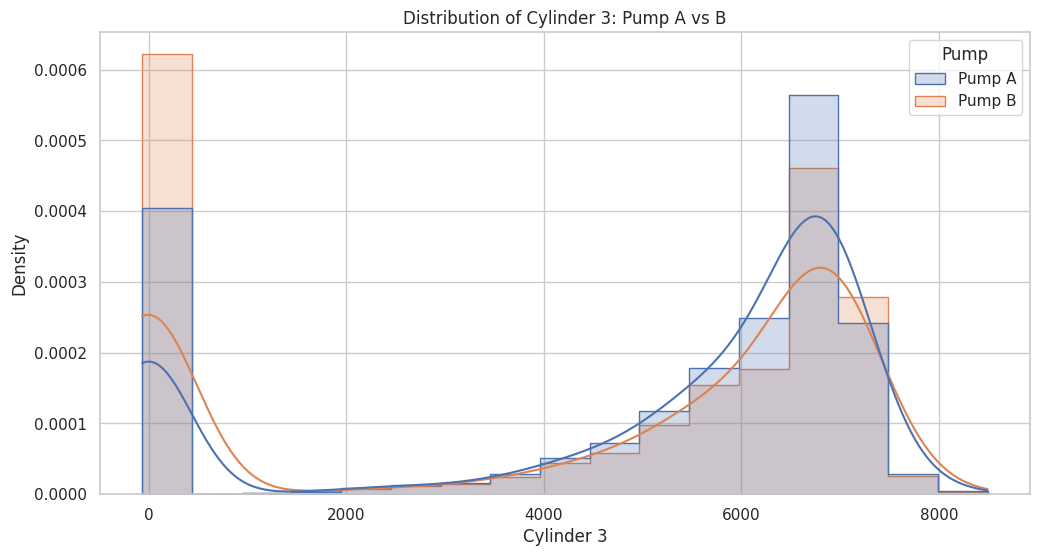

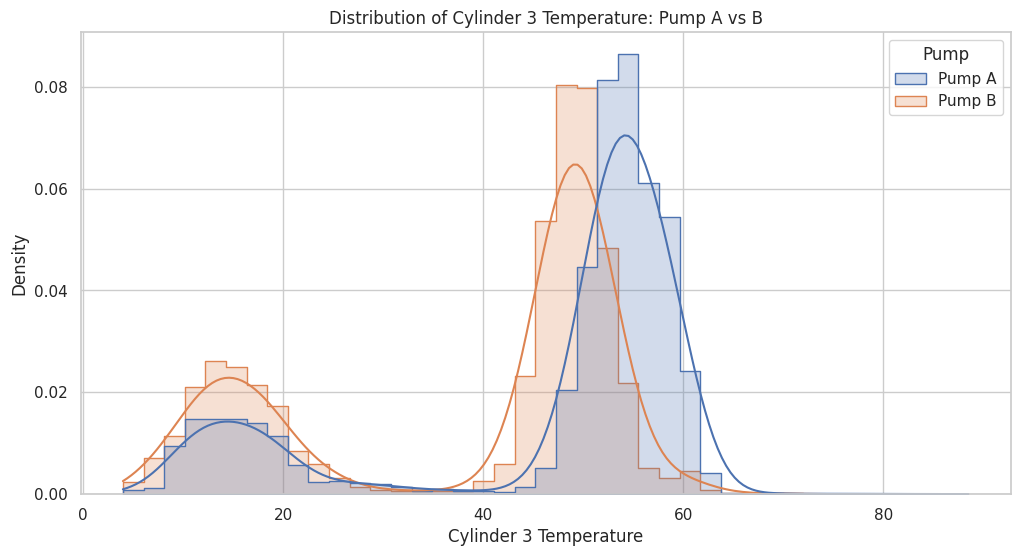

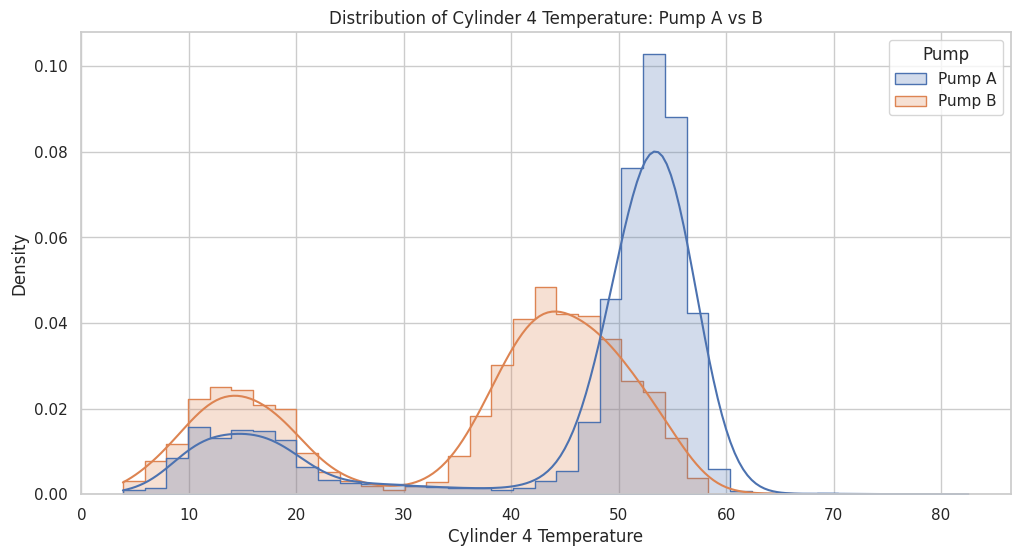

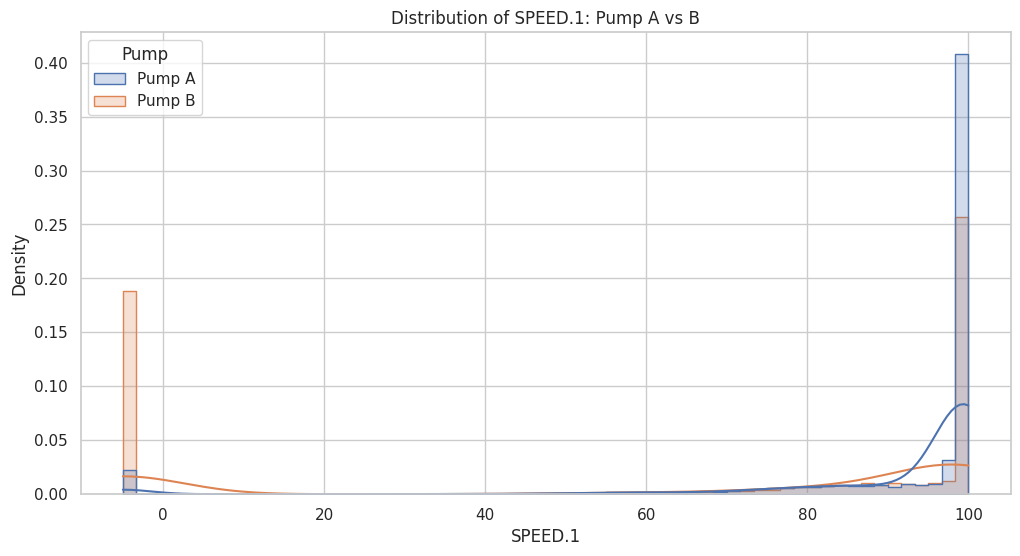

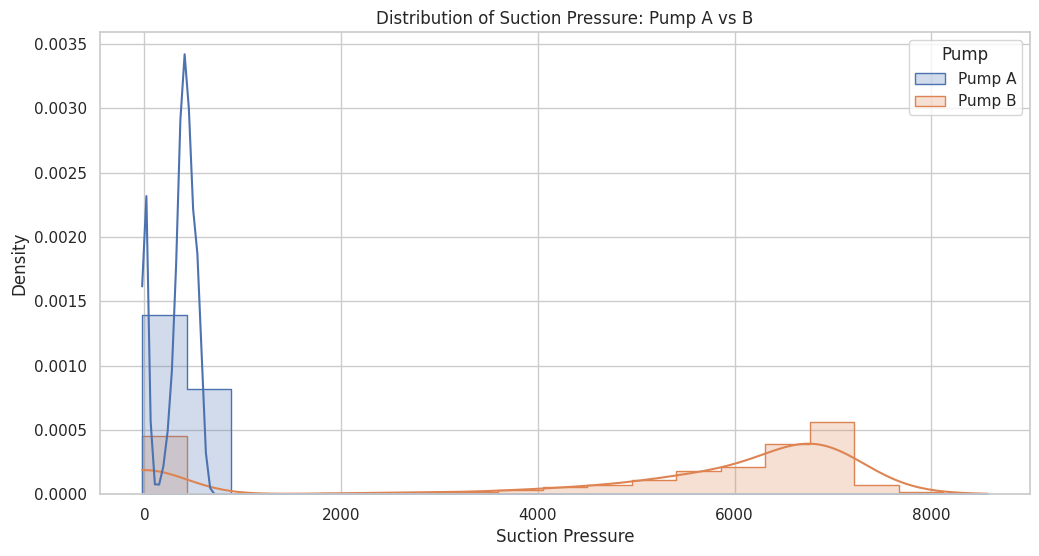

In [12]:
def plot_distribution(feature):
    plt.figure(figsize=(12, 6))
    sns.histplot(data=df_combined, x=feature, hue='Pump', kde=True, element="step", stat="density", common_norm=False)
    plt.title(f'Distribution of {feature}: Pump A vs B')
    plt.show()

for col in numeric_cols:
    plot_distribution(col)

## 1.5. EDA: Feature History Over Time


Plotting the raw values of each feature over time helps us identify trends, shifts in operation, and potential anomalies.


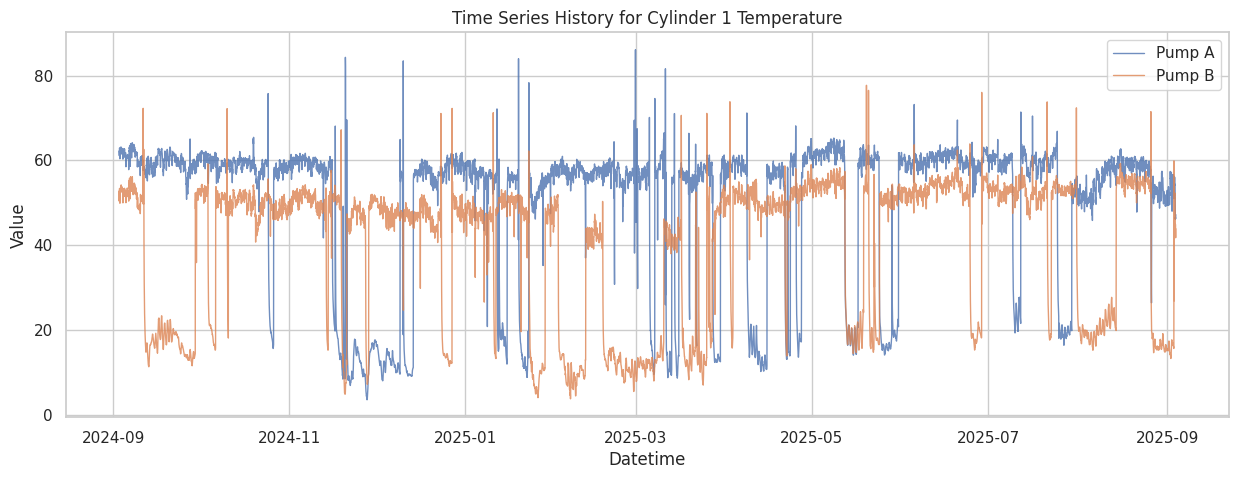

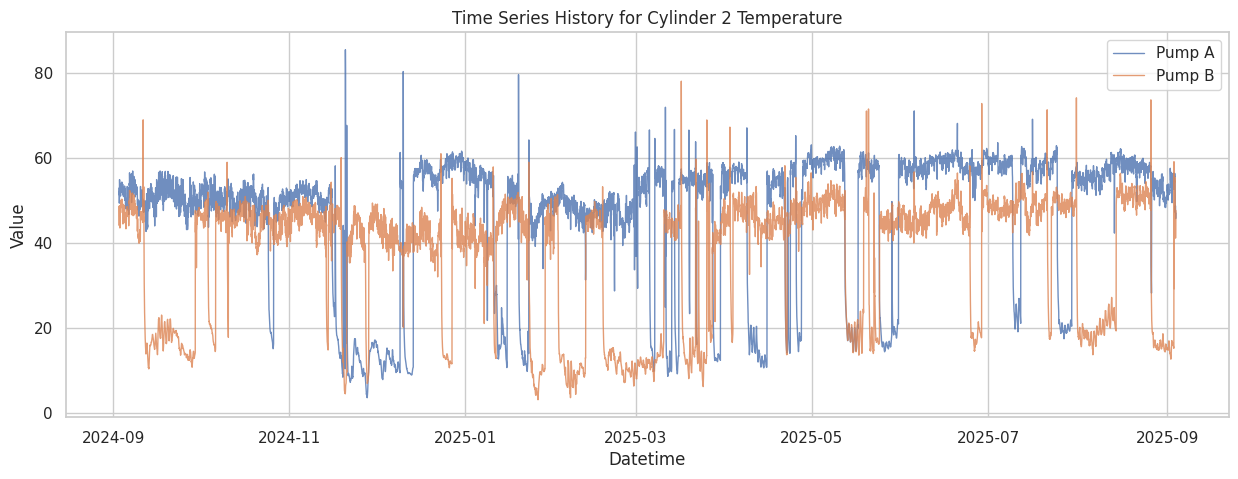

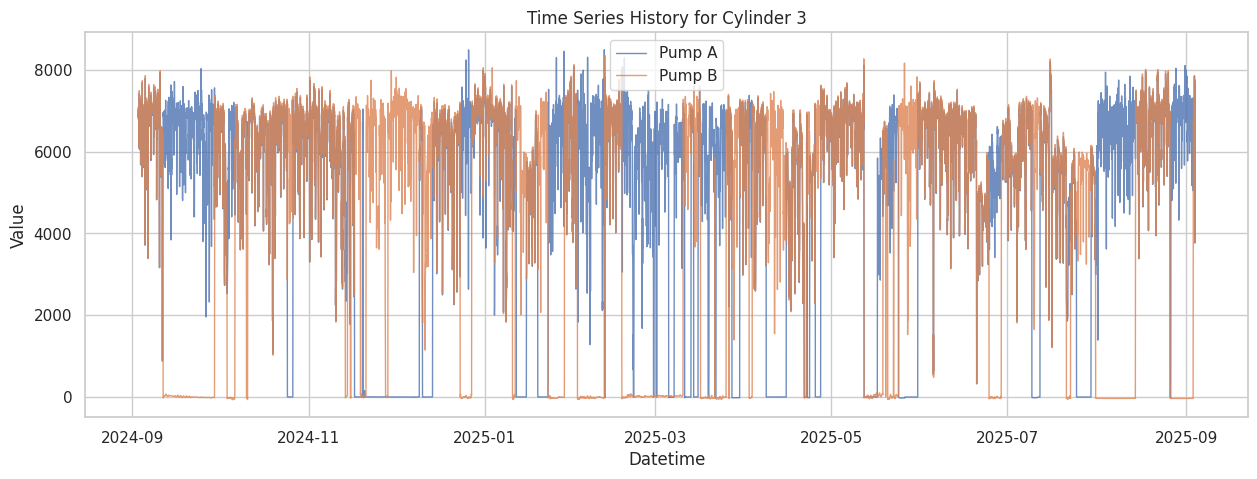

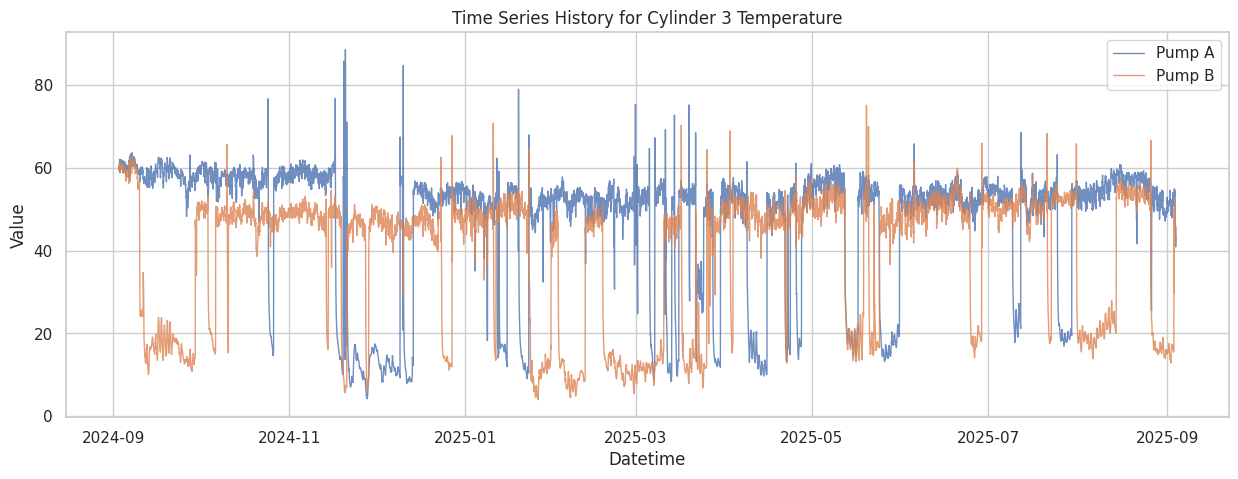

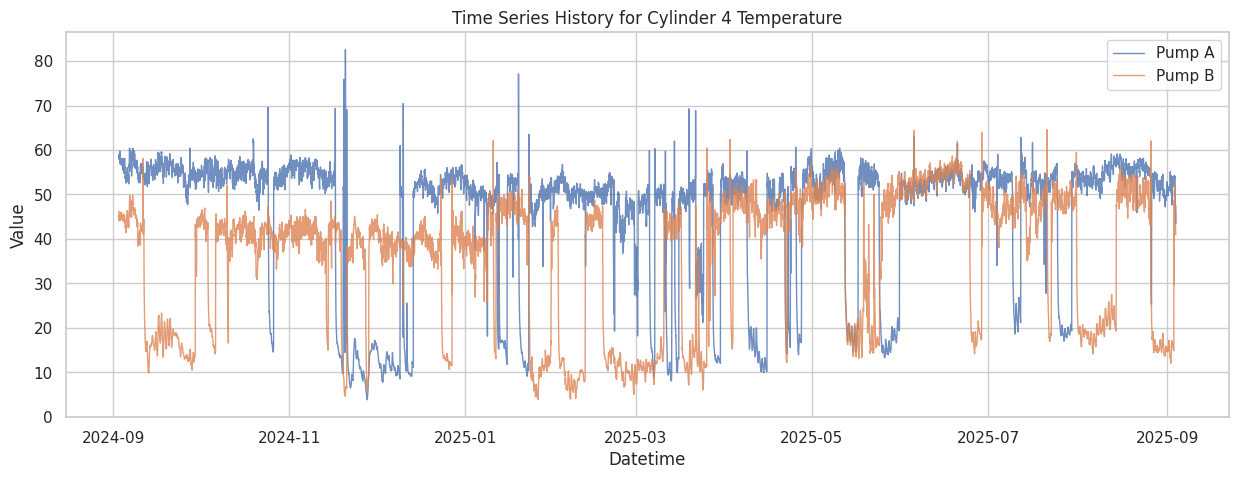

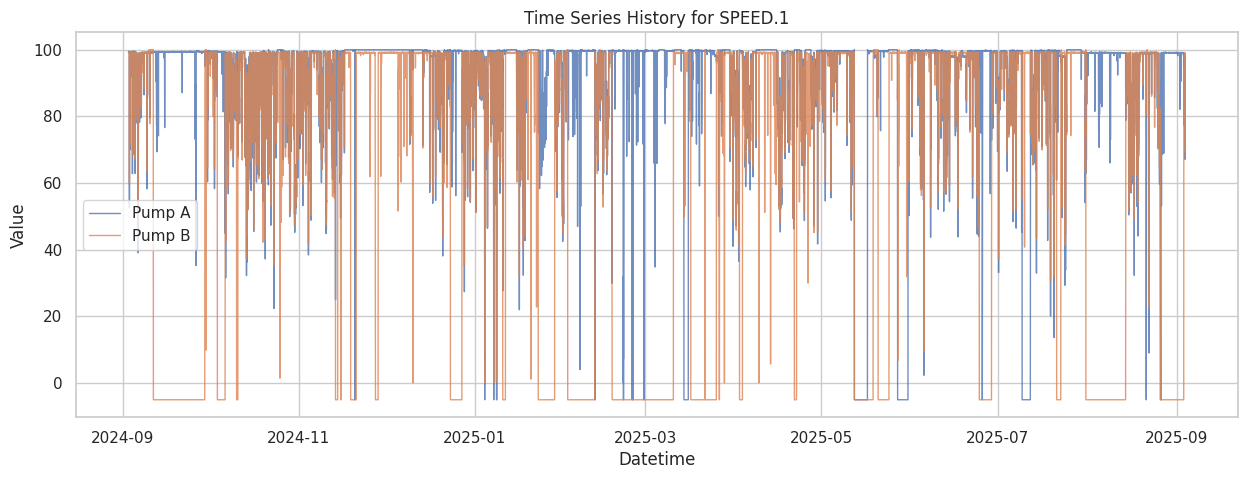

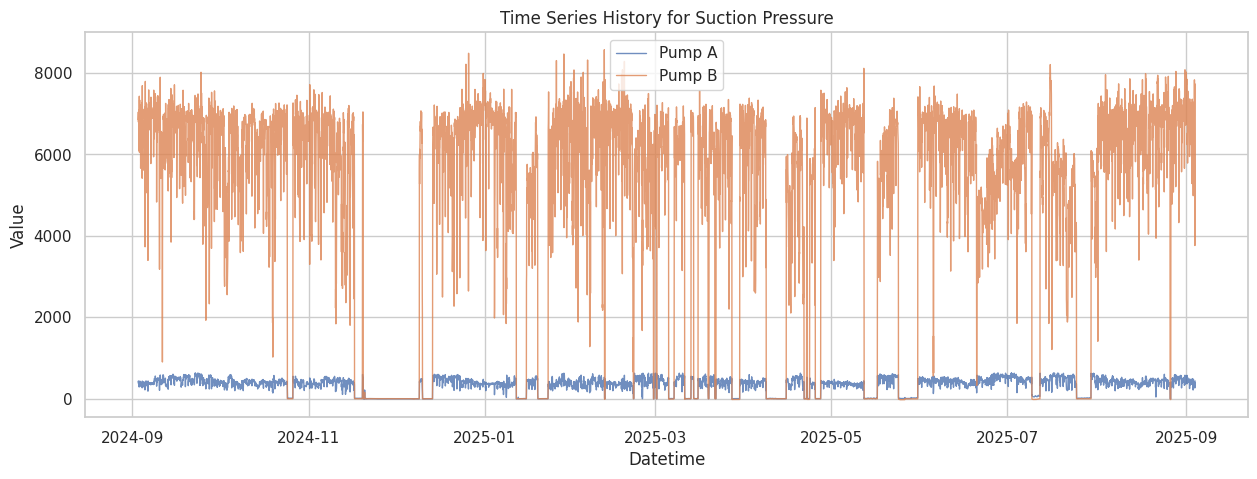

In [13]:
df_a_plt = df_combined[df_combined['Pump'] == 'Pump A'].set_index('Datetime')
df_b_plt = df_combined[df_combined['Pump'] == 'Pump B'].set_index('Datetime')

for col in numeric_cols:
    plt.figure(figsize=(15, 5))
    plt.plot(df_a_plt.index, df_a_plt[col], label='Pump A', alpha=0.8, linewidth=1)
    plt.plot(df_b_plt.index, df_b_plt[col], label='Pump B', alpha=0.8, linewidth=1)
    plt.title(f'Time Series History for {col}')
    plt.xlabel('Datetime')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

## 1.6. Feature Engineering: Rolling Statistics


In [14]:
window_size = 24
cols_to_exclude = ['Suction Pressure', 'Cylinder 3', 'SPEED.1'] 
cols_to_roll = [col for col in numeric_cols if col not in cols_to_exclude]
df_rolling_features = df_combined[['Datetime', 'Pump'] + cols_to_exclude].copy()

for pump_name, group in df_combined.groupby('Pump'):
    pump_df = group.set_index('Datetime').sort_index()
    for col in cols_to_roll:
        rolling_mean = pump_df[col].rolling(window=window_size, min_periods=1).mean()
        rolling_std = pump_df[col].rolling(window=window_size, min_periods=1).std()
        df_rolling_features.loc[df_rolling_features['Pump'] == pump_name, f'{col}_rolling_mean_{window_size}h'] = rolling_mean.values
        df_rolling_features.loc[df_rolling_features['Pump'] == pump_name, f'{col}_rolling_std_{window_size}h'] = rolling_std.values

df_rolling_features.bfill(inplace=True)
df_rolling_features.ffill(inplace=True) 

df_a_model_ready = df_rolling_features[df_rolling_features['Pump'] == 'Pump A'].copy()
df_b_model_ready = df_rolling_features[df_rolling_features['Pump'] == 'Pump B'].copy()

print("--- Model-Ready DataFrame Head for Pump A ---")
df_a_model_ready.head()

--- Model-Ready DataFrame Head for Pump A ---


,Datetime,Pump,Suction Pressure,Cylinder 3,SPEED.1,Cylinder 1 Temperature_rolling_mean_24h,Cylinder 1 Temperature_rolling_std_24h,Cylinder 2 Temperature_rolling_mean_24h,Cylinder 2 Temperature_rolling_std_24h,Cylinder 3 Temperature_rolling_mean_24h,Cylinder 3 Temperature_rolling_std_24h,Cylinder 4 Temperature_rolling_mean_24h,Cylinder 4 Temperature_rolling_std_24h
0,2024-09-03 00:00:00,Pump A,387.835968,6795.823242,99.395256,62.210194,0.405503,52.913517,1.109869,59.367279,0.270894,57.872066,0.193115
1,2024-09-03 01:00:00,Pump A,434.914001,7035.887695,99.322189,61.923460,0.405503,52.128721,1.109869,59.558830,0.270894,58.008619,0.193115
2,2024-09-03 02:00:00,Pump A,424.093658,6843.666016,99.467384,61.758123,0.405247,52.126200,0.784808,59.830541,0.508106,58.331022,0.574871
3,2024-09-03 03:00:00,Pump A,423.871460,6951.882324,99.364395,61.593783,0.466383,51.437377,1.519384,59.864553,0.420407,58.275537,0.482319
4,2024-09-03 04:00:00,Pump A,425.911072,6958.680664,99.500214,61.579710,0.405124,51.206067,1.413830,60.228601,0.891745,58.276570,0.417707


# PART 2: A New, More Effective Modeling Strategy


Our previous attempt to predict 168 hours at once was too complex and yielded poor results. We will now reframe the problem to be more realistic and actionable:

**New Strategy:**
- **Input Sequence Length:** Use the last **72 hours** of data.
- **Prediction Window:** Predict the pump status for the next **72 hours**.

To support this, we will use a more powerful model architecture:
- **Bidirectional LSTM (BiLSTM):** Processes sequences forwards and backwards to capture richer patterns.
- **Learning Rate Scheduler:** Optimizes the training process for better convergence.


In [39]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch.optim.lr_scheduler import StepLR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

class BidirectionalLSTM(nn.Module):
    def __init__(self, input_size, hidden_size=64, output_size=12, num_layers=2, dropout=0.3):
        super(BidirectionalLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout, bidirectional=True)
        self.fc = nn.Linear(hidden_size * 2, output_size)
    def forward(self, x):
        out, _ = self.lstm(x)
        last_hidden = out[:, -1, :]
        return self.fc(last_hidden)

class PumpDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.FloatTensor(X)
        self.y = torch.FloatTensor(y)
    def __len__(self): return len(self.X)
    def __getitem__(self, idx): return self.X[idx], self.y[idx]

# PART 3: Training BiLSTM for Mud Pump A


### 3.1. Prepare and Sequence Data for Pump A


In [40]:
TARGET_COL_A = 'Mud Pump A'
df_merged_a = pd.merge(df_a_model_ready, df_a_original[['Datetime', TARGET_COL_A]], on='Datetime', how='inner')
df_merged_a = df_merged_a[df_merged_a[TARGET_COL_A] != 'Error']
df_merged_a.dropna(inplace=True)

feature_cols_a = [col for col in df_merged_a.columns if col not in ['Datetime', 'Pump', TARGET_COL_A]]
feature_values_a = df_merged_a[feature_cols_a].values
status_binary_a = (df_merged_a[TARGET_COL_A] == 'STOP').astype(int).values

INPUT_SEQUENCE_LENGTH = 72
PREDICTION_WINDOW = 72

X_list_a, y_list_a = [], []
for i in range(INPUT_SEQUENCE_LENGTH, len(feature_values_a) - PREDICTION_WINDOW):
    X_list_a.append(feature_values_a[i - INPUT_SEQUENCE_LENGTH : i])
    y_list_a.append(status_binary_a[i : i + PREDICTION_WINDOW])

X_a, y_a = np.array(X_list_a), np.array(y_list_a)
print(f"Pump A - X shape: {X_a.shape}, y shape: {y_a.shape}")

Pump A - X shape: (8641, 72, 11), y shape: (8641, 72)


### 3.2. Split, Scale, and Load Data for Pump A


In [ ]:
train_size_a = int(len(X_a) * 0.8)
X_train_a, X_test_a = X_a[:train_size_a], X_a[train_size_a:]
y_train_a, y_test_a = y_a[:train_size_a], y_a[train_size_a:]

scaler_a = StandardScaler()
X_train_s_a = scaler_a.fit_transform(X_train_a.reshape(-1, X_a.shape[2])).reshape(X_train_a.shape)
X_test_s_a = scaler_a.transform(X_test_a.reshape(-1, X_a.shape[2])).reshape(X_test_a.shape)

train_loader_a = DataLoader(PumpDataset(X_train_s_a, y_train_a), batch_size=64, shuffle=False)
test_loader_a = DataLoader(PumpDataset(X_test_s_a, y_test_a), batch_size=64, shuffle=False)

### 3.3. Train the BiLSTM Model for Pump A


In [41]:
num_stops_a = np.sum(y_train_a == 1)
num_runs_a = np.sum(y_train_a == 0)
pos_weight_a = torch.tensor(num_runs_a / num_stops_a if num_stops_a > 0 else 1.0)
print(f"Pump A - Minority class ('STOP') weight: {pos_weight_a.item():.2f}")

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_a = BidirectionalLSTM(input_size=X_a.shape[2], output_size=PREDICTION_WINDOW).to(device)
criterion_a = nn.BCEWithLogitsLoss(pos_weight=pos_weight_a.to(device))
optimizer_a = optim.Adam(model_a.parameters(), lr=0.001, weight_decay=1e-5)
scheduler_a = StepLR(optimizer_a, step_size=10, gamma=0.1)

epochs = 75
train_losses_a = []
print("\n--- Starting Training for Pump A ---")
for epoch in range(epochs):
    model_a.train()
    epoch_loss_a = 0
    for X_batch, y_batch in train_loader_a:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer_a.zero_grad()
        outputs = model_a(X_batch)
        loss = criterion_a(outputs, y_batch)
        loss.backward()
        optimizer_a.step()
        epoch_loss_a += loss.item()
    
    avg_loss_a = epoch_loss_a / len(train_loader_a)
    train_losses_a.append(avg_loss_a)
    scheduler_a.step()
    if (epoch+1) % 5 == 0:
        print(f"  Epoch {epoch+1:02}/{epochs}, Avg Loss: {avg_loss_a:.4f}, LR: {scheduler_a.get_last_lr()[0]:.6f}")
print("--- Training Finished for Pump A ---")

Pump A - Minority class ('STOP') weight: 3.29

--- Starting Training for Pump A ---
  Epoch 05/75, Avg Loss: 0.7659, LR: 0.001000
  Epoch 10/75, Avg Loss: 0.7427, LR: 0.000100
  Epoch 15/75, Avg Loss: 0.7072, LR: 0.000100
  Epoch 20/75, Avg Loss: 0.7024, LR: 0.000010
  Epoch 25/75, Avg Loss: 0.6993, LR: 0.000010
  Epoch 30/75, Avg Loss: 0.6997, LR: 0.000001
  Epoch 35/75, Avg Loss: 0.6972, LR: 0.000001
  Epoch 40/75, Avg Loss: 0.6991, LR: 0.000000
  Epoch 45/75, Avg Loss: 0.6987, LR: 0.000000
  Epoch 50/75, Avg Loss: 0.6979, LR: 0.000000
  Epoch 55/75, Avg Loss: 0.6988, LR: 0.000000
  Epoch 60/75, Avg Loss: 0.6996, LR: 0.000000
  Epoch 65/75, Avg Loss: 0.6989, LR: 0.000000
  Epoch 70/75, Avg Loss: 0.6989, LR: 0.000000
  Epoch 75/75, Avg Loss: 0.6986, LR: 0.000000
--- Training Finished for Pump A ---


### 3.4. Visualize Training Loss for Pump A


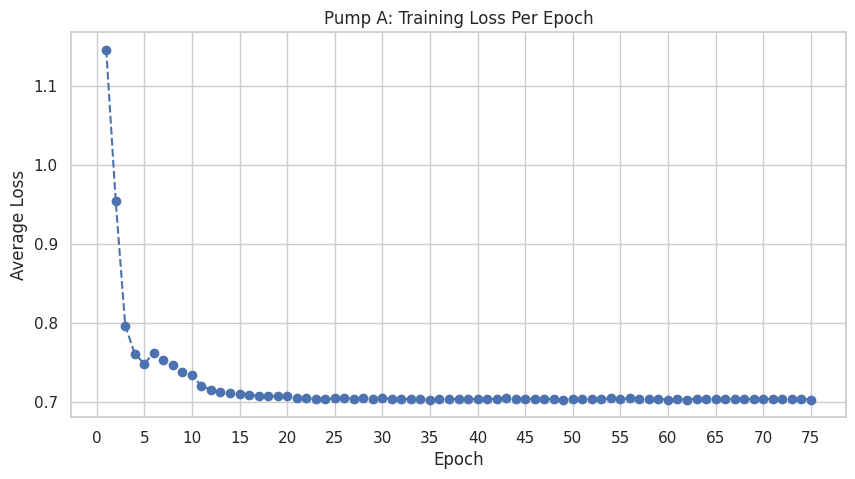

In [37]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), train_losses_a, marker='o', linestyle='--')
plt.title('Pump A: Training Loss Per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.xticks(range(0, epochs + 1, 5))
plt.grid(True)
plt.show()

### 3.5. Evaluate Model for Pump A



--- Pump A: Classification Report (Hourly Level) ---
              precision    recall  f1-score   support

     RUN (0)       0.94      0.96      0.95    110376
    STOP (1)       0.64      0.50      0.56     14112

    accuracy                           0.91    124488
   macro avg       0.79      0.73      0.75    124488
weighted avg       0.90      0.91      0.91    124488



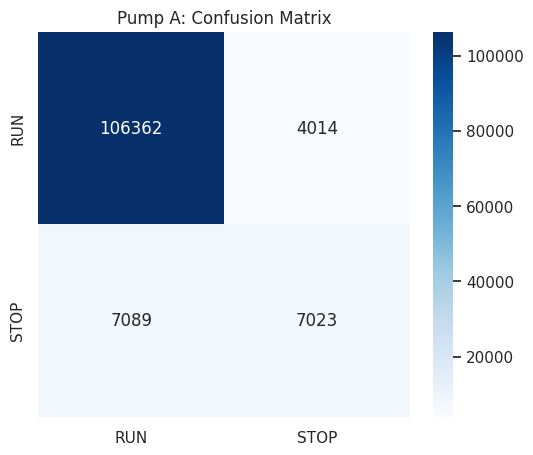

In [38]:
model_a.eval()
all_preds_proba_a, all_targets_a = [], []
with torch.no_grad():
    for X_batch, y_batch in test_loader_a:
        outputs = model_a(X_batch.to(device))
        all_preds_proba_a.append(torch.sigmoid(outputs).cpu().numpy())
        all_targets_a.append(y_batch.numpy())

y_pred_proba_a = np.concatenate(all_preds_proba_a)
y_test_np_a = np.concatenate(all_targets_a)
y_pred_flat_a = (y_pred_proba_a > 0.8).astype(int).flatten()
y_test_flat_a = y_test_np_a.flatten()

print("\n--- Pump A: Classification Report (Hourly Level) ---")
print(classification_report(y_test_flat_a, y_pred_flat_a, target_names=['RUN (0)', 'STOP (1)']))

cm_a = confusion_matrix(y_test_flat_a, y_pred_flat_a)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_a, annot=True, fmt='d', cmap='Blues', xticklabels=['RUN', 'STOP'], yticklabels=['RUN', 'STOP'])
plt.title('Pump A: Confusion Matrix')
plt.show()

# PART 4: Training BiLSTM for Mud Pump B


### 4.1. Prepare and Sequence Data for Pump B


In [21]:
TARGET_COL_B = 'Mud Pump B'
df_merged_b = pd.merge(df_b_model_ready, df_b_original[['Datetime', TARGET_COL_B]], on='Datetime', how='inner')
df_merged_b = df_merged_b[df_merged_b[TARGET_COL_B] != 'Error']
df_merged_b.dropna(inplace=True)

feature_cols_b = [col for col in df_merged_b.columns if col not in ['Datetime', 'Pump', TARGET_COL_B]]
feature_values_b = df_merged_b[feature_cols_b].values
status_binary_b = (df_merged_b[TARGET_COL_B] == 'STOP').astype(int).values

X_list_b, y_list_b = [], []
for i in range(INPUT_SEQUENCE_LENGTH, len(feature_values_b) - PREDICTION_WINDOW):
    X_list_b.append(feature_values_b[i - INPUT_SEQUENCE_LENGTH : i])
    y_list_b.append(status_binary_b[i : i + PREDICTION_WINDOW])

X_b, y_b = np.array(X_list_b), np.array(y_list_b)
print(f"Pump B - X shape: {X_b.shape}, y shape: {y_b.shape}")

Pump B - X shape: (8643, 72, 11), y shape: (8643, 72)


### 4.2. Split, Scale, and Load Data for Pump B


In [22]:
train_size_b = int(len(X_b) * 0.8)
X_train_b, X_test_b = X_b[:train_size_b], X_b[train_size_b:]
y_train_b, y_test_b = y_b[:train_size_b], y_b[train_size_b:]

scaler_b = StandardScaler()
X_train_s_b = scaler_b.fit_transform(X_train_b.reshape(-1, X_b.shape[2])).reshape(X_train_b.shape)
X_test_s_b = scaler_b.transform(X_test_b.reshape(-1, X_b.shape[2])).reshape(X_test_b.shape)

train_loader_b = DataLoader(PumpDataset(X_train_s_b, y_train_b), batch_size=64, shuffle=False)
test_loader_b = DataLoader(PumpDataset(X_test_s_b, y_test_b), batch_size=64, shuffle=False)

### 4.3. Train the BiLSTM Model for Pump B


In [23]:
num_stops_b = np.sum(y_train_b == 1)
num_runs_b = np.sum(y_train_b == 0)
pos_weight_b = torch.tensor(num_runs_b / num_stops_b if num_stops_b > 0 else 1.0)
print(f"Pump B - Minority class ('STOP') weight: {pos_weight_b.item():.2f}")

model_b = BidirectionalLSTM(input_size=X_b.shape[2], output_size=PREDICTION_WINDOW).to(device)
criterion_b = nn.BCEWithLogitsLoss(pos_weight=pos_weight_b.to(device))
optimizer_b = optim.Adam(model_b.parameters(), lr=0.001, weight_decay=1e-5)

scheduler_b = StepLR(optimizer_b, step_size=10, gamma=0.1)

train_losses_b = []
print("\n--- Starting Training for Pump B ---")
for epoch in range(epochs):
    model_b.train()
    epoch_loss_b = 0
    for X_batch, y_batch in train_loader_b:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer_b.zero_grad()
        outputs = model_b(X_batch)
        loss = criterion_b(outputs, y_batch)
        loss.backward()
        optimizer_b.step()
        epoch_loss_b += loss.item()
        
    avg_loss_b = epoch_loss_b / len(train_loader_b)
    train_losses_b.append(avg_loss_b)
    scheduler_b.step()
    if (epoch+1) % 5 == 0:
        print(f"  Epoch {epoch+1:02}/{epochs}, Avg Loss: {avg_loss_b:.4f}, LR: {scheduler_b.get_last_lr()[0]:.6f}")
print("--- Training Finished for Pump B ---")

Pump B - Minority class ('STOP') weight: 2.29

--- Starting Training for Pump B ---
  Epoch 05/75, Avg Loss: 0.5750, LR: 0.001000
  Epoch 10/75, Avg Loss: 0.5657, LR: 0.000100
  Epoch 15/75, Avg Loss: 0.5424, LR: 0.000100
  Epoch 20/75, Avg Loss: 0.5341, LR: 0.000010
  Epoch 25/75, Avg Loss: 0.5357, LR: 0.000010
  Epoch 30/75, Avg Loss: 0.5326, LR: 0.000001
  Epoch 35/75, Avg Loss: 0.5312, LR: 0.000001
  Epoch 40/75, Avg Loss: 0.5314, LR: 0.000000
  Epoch 45/75, Avg Loss: 0.5309, LR: 0.000000
  Epoch 50/75, Avg Loss: 0.5307, LR: 0.000000
  Epoch 55/75, Avg Loss: 0.5315, LR: 0.000000
  Epoch 60/75, Avg Loss: 0.5311, LR: 0.000000
  Epoch 65/75, Avg Loss: 0.5316, LR: 0.000000
  Epoch 70/75, Avg Loss: 0.5312, LR: 0.000000
  Epoch 75/75, Avg Loss: 0.5312, LR: 0.000000
--- Training Finished for Pump B ---


### 4.4. Visualize Training Loss for Pump B


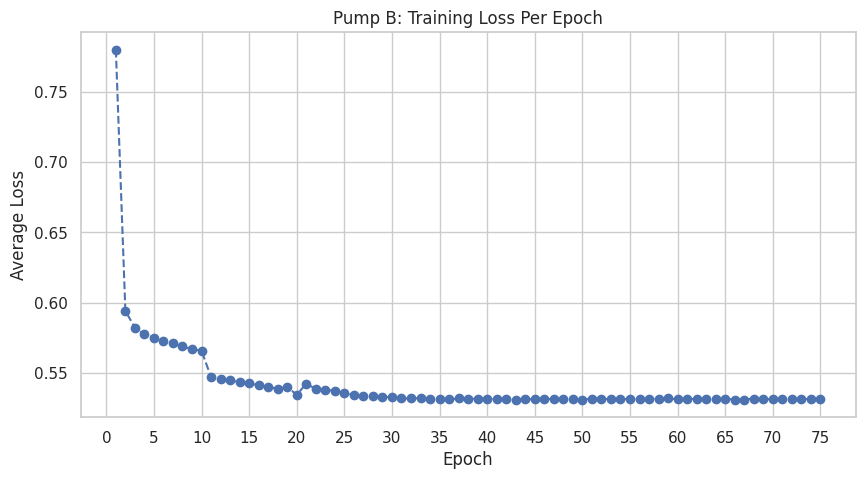

In [24]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), train_losses_b, marker='o', linestyle='--')
plt.title('Pump B: Training Loss Per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.xticks(range(0, epochs + 1, 5))
plt.grid(True)
plt.show()

### 4.5. Evaluate Model for Pump B



--- Pump B: Classification Report (Hourly Level) ---
              precision    recall  f1-score   support

     RUN (0)       0.85      0.92      0.89     78405
    STOP (1)       0.84      0.73      0.78     46083

    accuracy                           0.85    124488
   macro avg       0.85      0.83      0.83    124488
weighted avg       0.85      0.85      0.85    124488



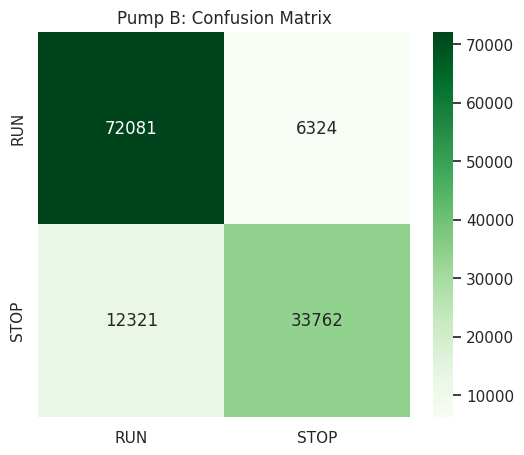

In [25]:
model_b.eval()
all_preds_proba_b, all_targets_b = [], []
with torch.no_grad():
    for X_batch, y_batch in test_loader_b:
        outputs = model_b(X_batch.to(device))
        all_preds_proba_b.append(torch.sigmoid(outputs).cpu().numpy())
        all_targets_b.append(y_batch.numpy())

y_pred_proba_b = np.concatenate(all_preds_proba_b)
y_test_np_b = np.concatenate(all_targets_b)
y_pred_flat_b = (y_pred_proba_b > 0.8).astype(int).flatten()
y_test_flat_b = y_test_np_b.flatten()

print("\n--- Pump B: Classification Report (Hourly Level) ---")
print(classification_report(y_test_flat_b, y_pred_flat_b, target_names=['RUN (0)', 'STOP (1)']))

cm_b = confusion_matrix(y_test_flat_b, y_pred_flat_b)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_b, annot=True, fmt='d', cmap='Greens', xticklabels=['RUN', 'STOP'], yticklabels=['RUN', 'STOP'])
plt.title('Pump B: Confusion Matrix')
plt.show()

In [26]:
import random

def visualize_pump_forecasts(y_true, y_pred_prob, pump_name, prediction_window=72, num_samples=3):
    """
    Plots specific examples where the pump actually stopped to see if the model predicted it.
    """
    # 1. Find indices where a failure (STOP=1) actually occurred in the test set
    # Summing along axis 1 tells us how many '1's are in the 72-hour window
    samples_with_failure = np.where(y_true.sum(axis=1) > 0)[0]
    
    if len(samples_with_failure) == 0:
        print(f"No failures found in the test set for {pump_name}.")
        return

    # 2. Select a few random samples from those failures to visualize
    # If we have fewer than requested samples, just take what we have
    n = min(len(samples_with_failure), num_samples)
    sample_indices = np.random.choice(samples_with_failure, n, replace=False)
    
    print(f"--- Visualizing {n} failure scenarios for {pump_name} ---")

    for i, idx in enumerate(sample_indices):
        plt.figure(figsize=(15, 5))
        
        # Create X-axis (Hours 1 to 72)
        hours = range(1, prediction_window + 1)
        
        # Plot Actual Status (Black Dashed Line)
        plt.plot(hours, y_true[idx], label='Actual Status (1=STOP)', 
                 color='black', linestyle='--', linewidth=2)
        
        # Plot Predicted Probability (Colored Line)
        # Pump A uses Blue/Red, Pump B uses Green/Red
        color = 'tab:blue' if 'A' in pump_name else 'tab:green'
        plt.plot(hours, y_pred_prob[idx], label='Predicted Probability', 
                 color=color, linewidth=2, alpha=0.8)
        
        # Fill area under probability for better visibility
        plt.fill_between(hours, y_pred_prob[idx], color=color, alpha=0.2)
        
        # Add Threshold Line
        plt.axhline(y=0.8, color='red', linestyle=':', alpha=0.5, label='Decision Threshold (0.8)')
        
        plt.title(f'{pump_name}: 72-Hour Forecast | Test Sample Index: {idx}')
        plt.xlabel('Hours into Future')
        plt.ylabel('Probability / Status')
        plt.ylim(-0.1, 1.1)
        plt.legend(loc='upper left')
        plt.grid(True, alpha=0.3)
        plt.show()



Pump A Matrix Shape: (1729, 72)
--- Visualizing 3 failure scenarios for Pump A ---


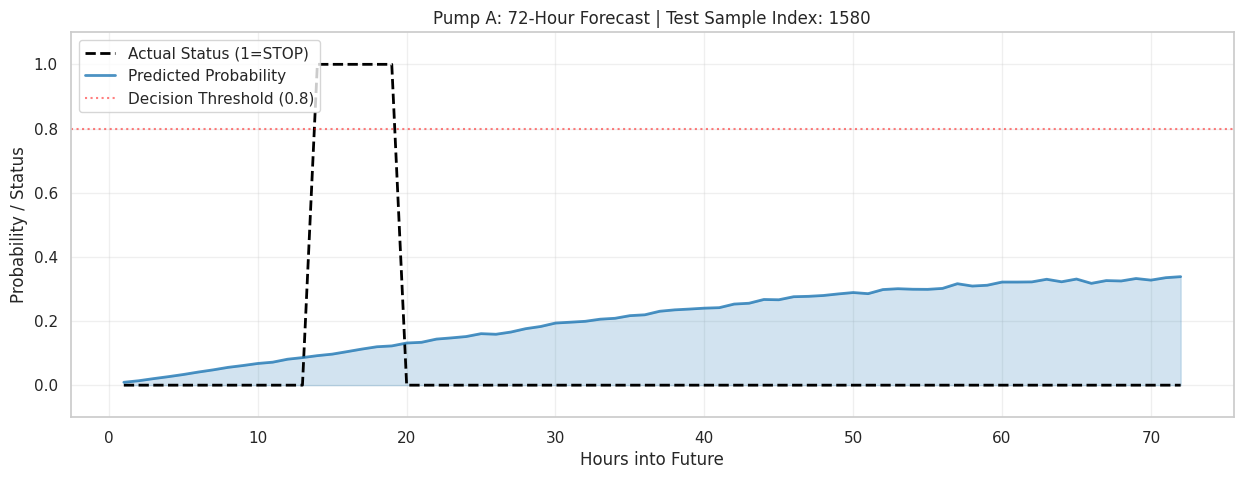

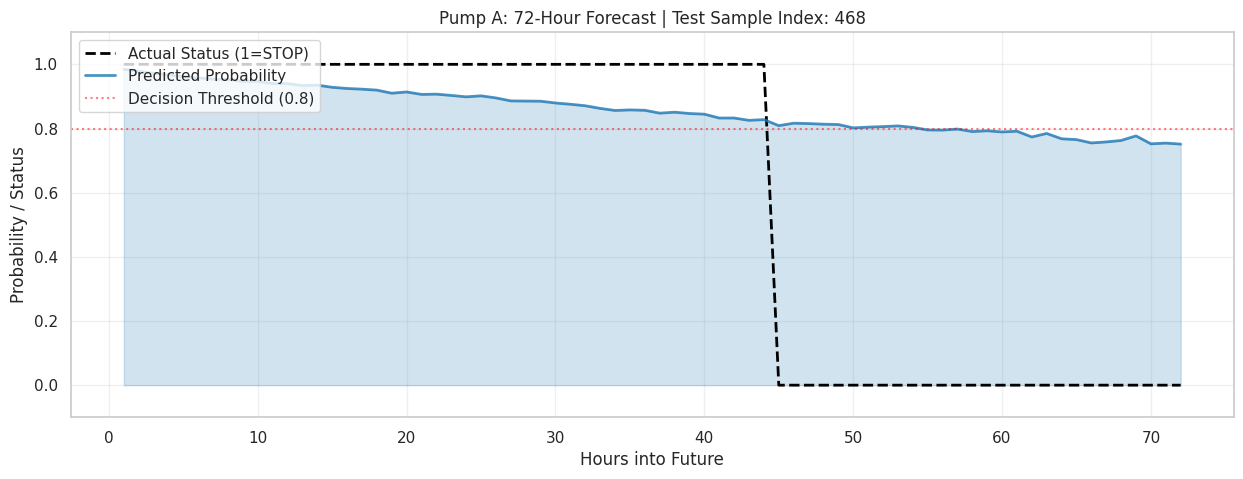

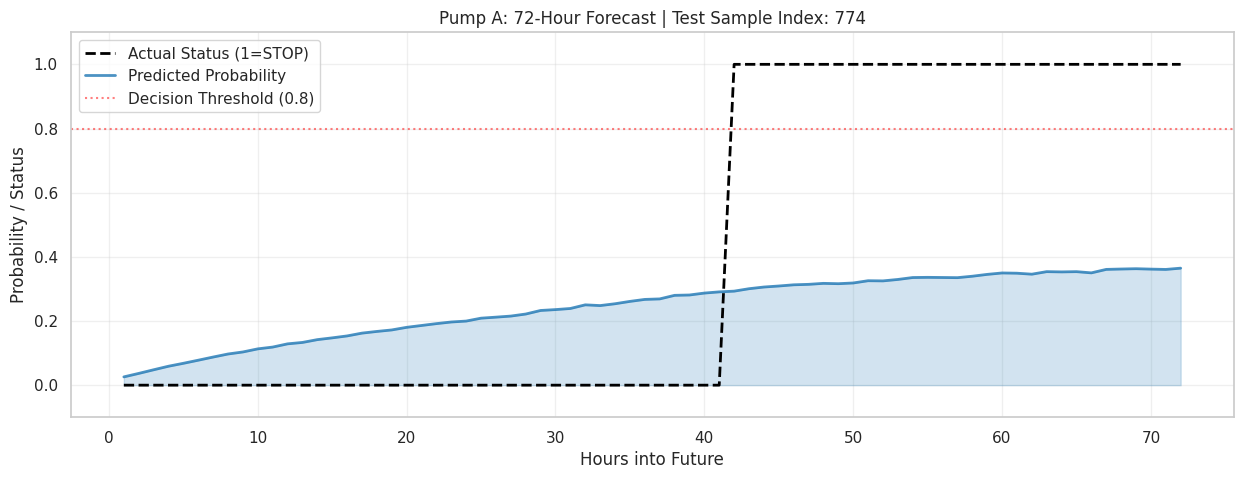

In [27]:
y_pred_proba_matrix_a = np.concatenate(all_preds_proba_a, axis=0)
y_test_matrix_a = np.concatenate(all_targets_a, axis=0)

# Double check the shape (It should be [Total_Test_Samples, 72])
print(f"Pump A Matrix Shape: {y_pred_proba_matrix_a.shape}")

visualize_pump_forecasts(y_test_matrix_a, y_pred_proba_matrix_a, 'Pump A', PREDICTION_WINDOW)


Pump B Matrix Shape: (1729, 72)
--- Visualizing 3 failure scenarios for Pump B ---


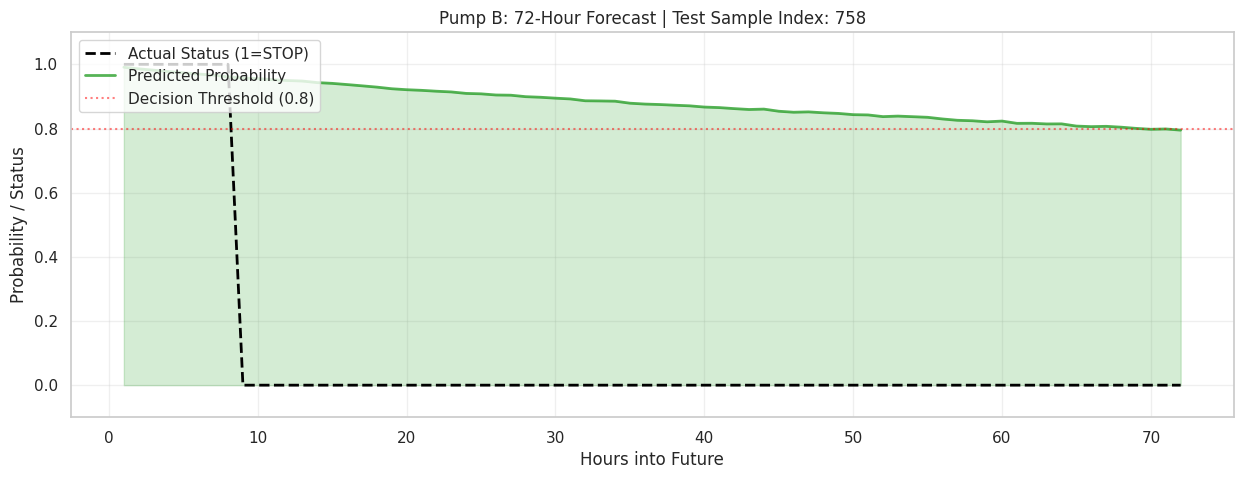

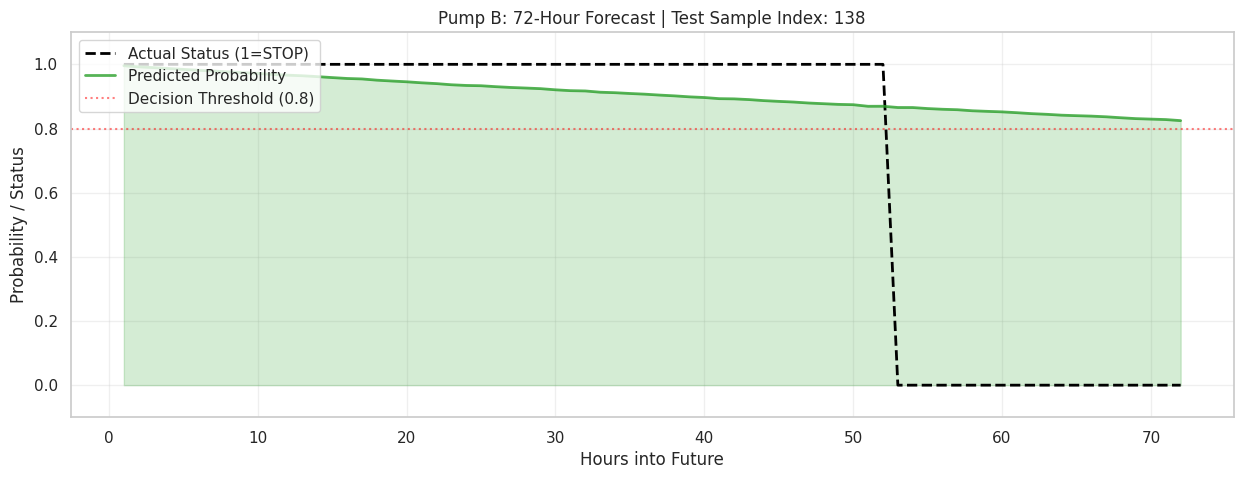

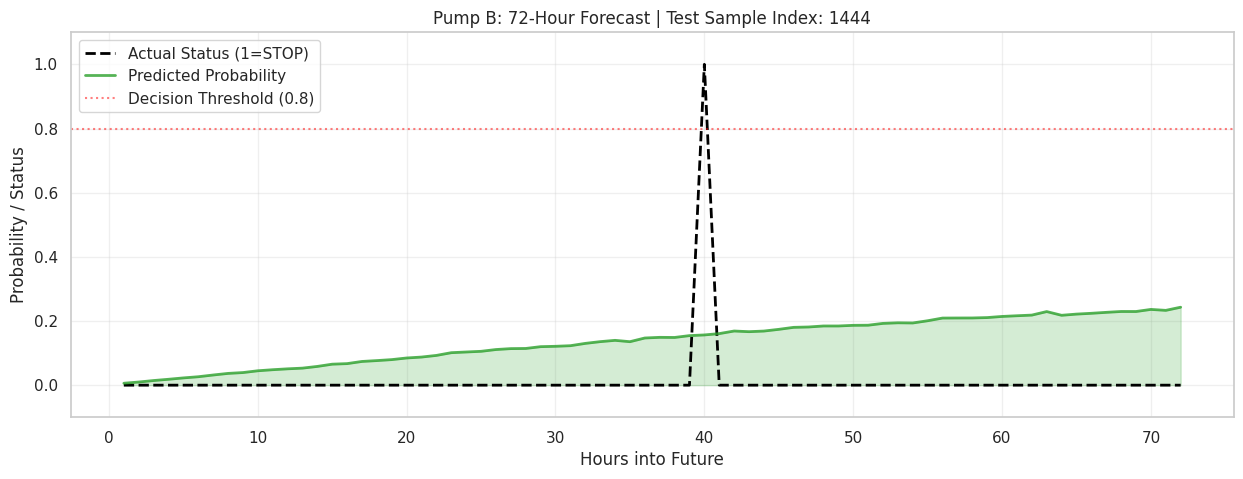

In [28]:
y_pred_proba_matrix_b = np.concatenate(all_preds_proba_b, axis=0)
y_test_matrix_b = np.concatenate(all_targets_b, axis=0)

# Double check the shape
print(f"Pump B Matrix Shape: {y_pred_proba_matrix_b.shape}")

visualize_pump_forecasts(y_test_matrix_b, y_pred_proba_matrix_b, 'Pump B', PREDICTION_WINDOW)

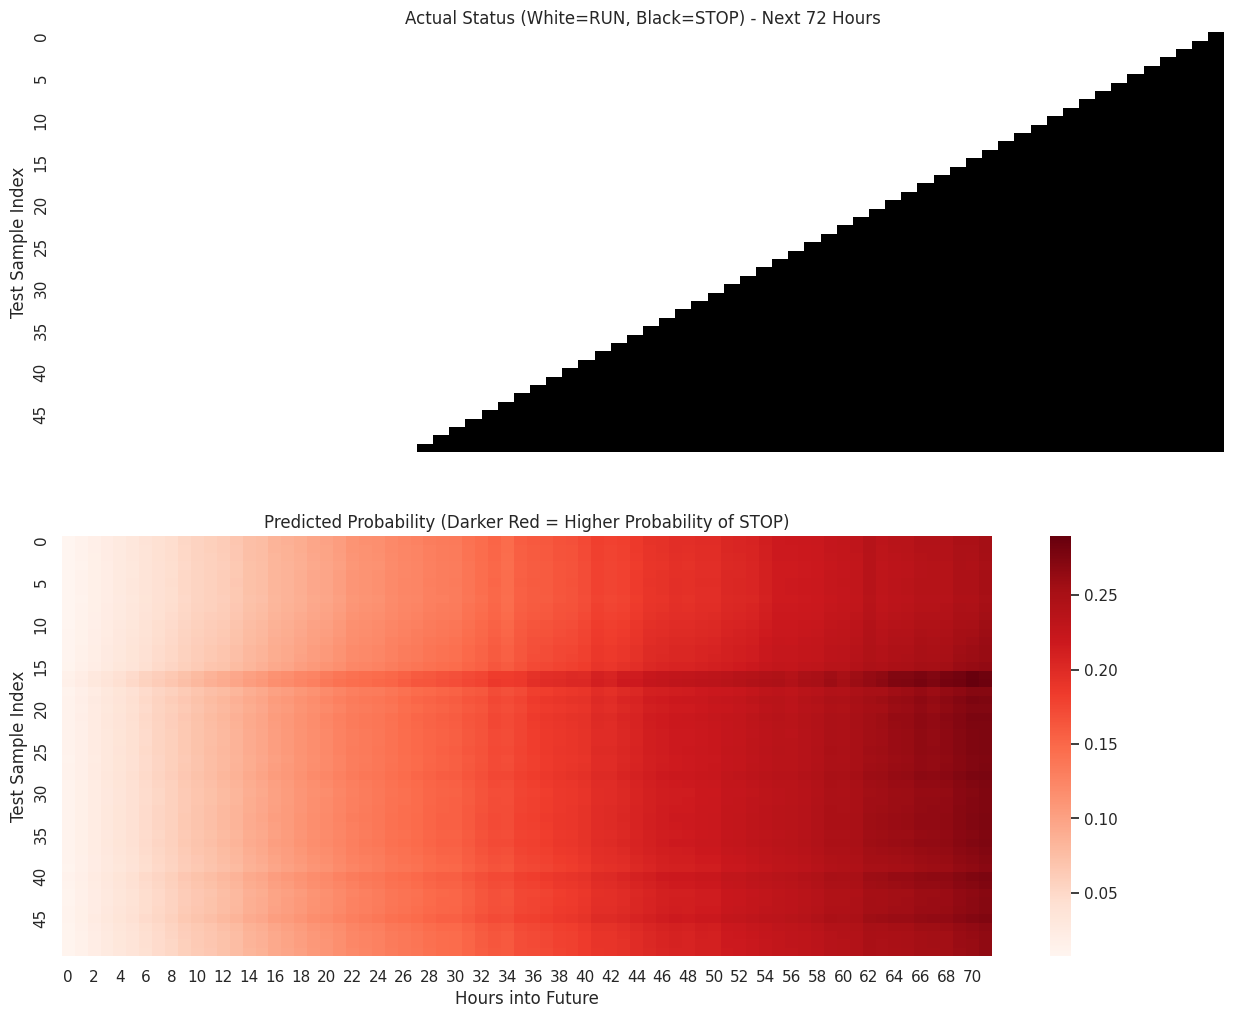

In [29]:
subset_size = 50 
start_idx = 0

# Find a section with failures to make the plot interesting
active_indices = np.where(y_test_matrix_b.sum(axis=1) > 0)[0]
if len(active_indices) > 0:
    start_idx = active_indices[0]

# Slice the data
heatmap_truth = y_test_matrix_b[start_idx : start_idx + subset_size]
heatmap_pred = y_pred_proba_matrix_b[start_idx : start_idx + subset_size]

fig, ax = plt.subplots(2, 1, figsize=(15, 12), sharex=True)

# Plot 1: Actuals
sns.heatmap(heatmap_truth, cmap='Greys', cbar=False, ax=ax[0], yticklabels=5)
ax[0].set_title(f'Actual Status (White=RUN, Black=STOP) - Next 72 Hours')
ax[0].set_ylabel('Test Sample Index')

# Plot 2: Predictions
sns.heatmap(heatmap_pred, cmap='Reds', ax=ax[1], yticklabels=5)
ax[1].set_title(f'Predicted Probability (Darker Red = Higher Probability of STOP)')
ax[1].set_xlabel('Hours into Future')
ax[1].set_ylabel('Test Sample Index')

plt.show()

In [30]:
# ensure we are using the concatenated (fixed) arrays
y_pred_proba_matrix_b = np.concatenate(all_preds_proba_b, axis=0)
y_test_matrix_b = np.concatenate(all_targets_b, axis=0)

print(f"Test Set Shape: {y_test_matrix_b.shape}")

# Extract the continuous timeline
# Since windows shift by 1 hour, the first element of each window 
# forms the continuous sequence for the "Next Hour" prediction.
actual_timeline = y_test_matrix_b[:, 0]
pred_timeline_1h = y_pred_proba_matrix_b[:, 0]

# We can also look at "24 Hours Ahead" predictions to see if the model gives early warnings
# We shift the array because the prediction made at time 't' for 't+24' should be plotted at 't+24'
pred_timeline_24h = np.full_like(actual_timeline, np.nan, dtype=float)
if y_pred_proba_matrix_b.shape[1] >= 24:
    # Take the 24th column (index 23)
    raw_24h = y_pred_proba_matrix_b[:, 23]
    # Shift it forward by 23 steps so it aligns with the actual event time
    pred_timeline_24h[23:] = raw_24h[:-23]

Test Set Shape: (1729, 72)


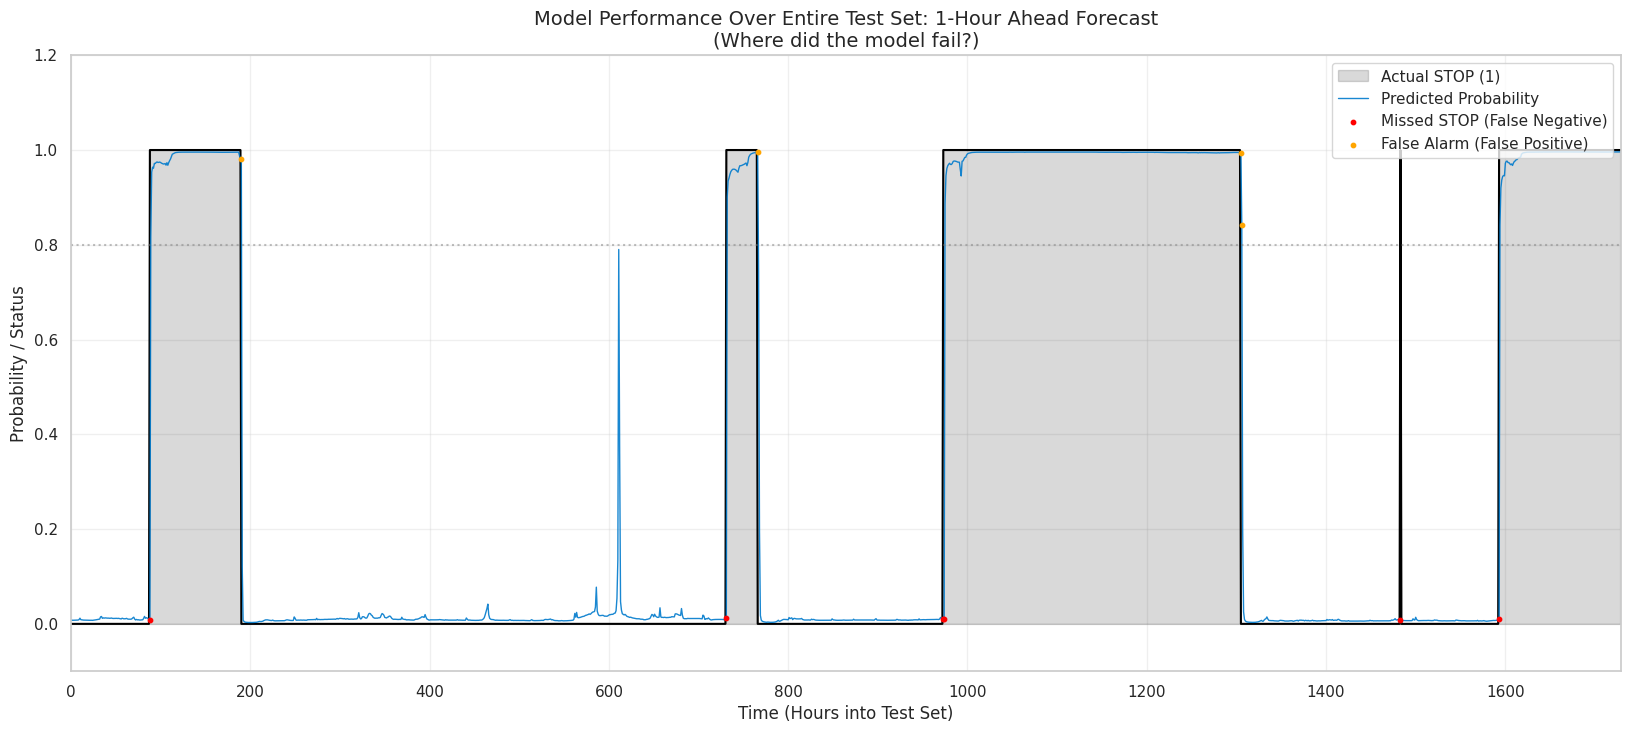

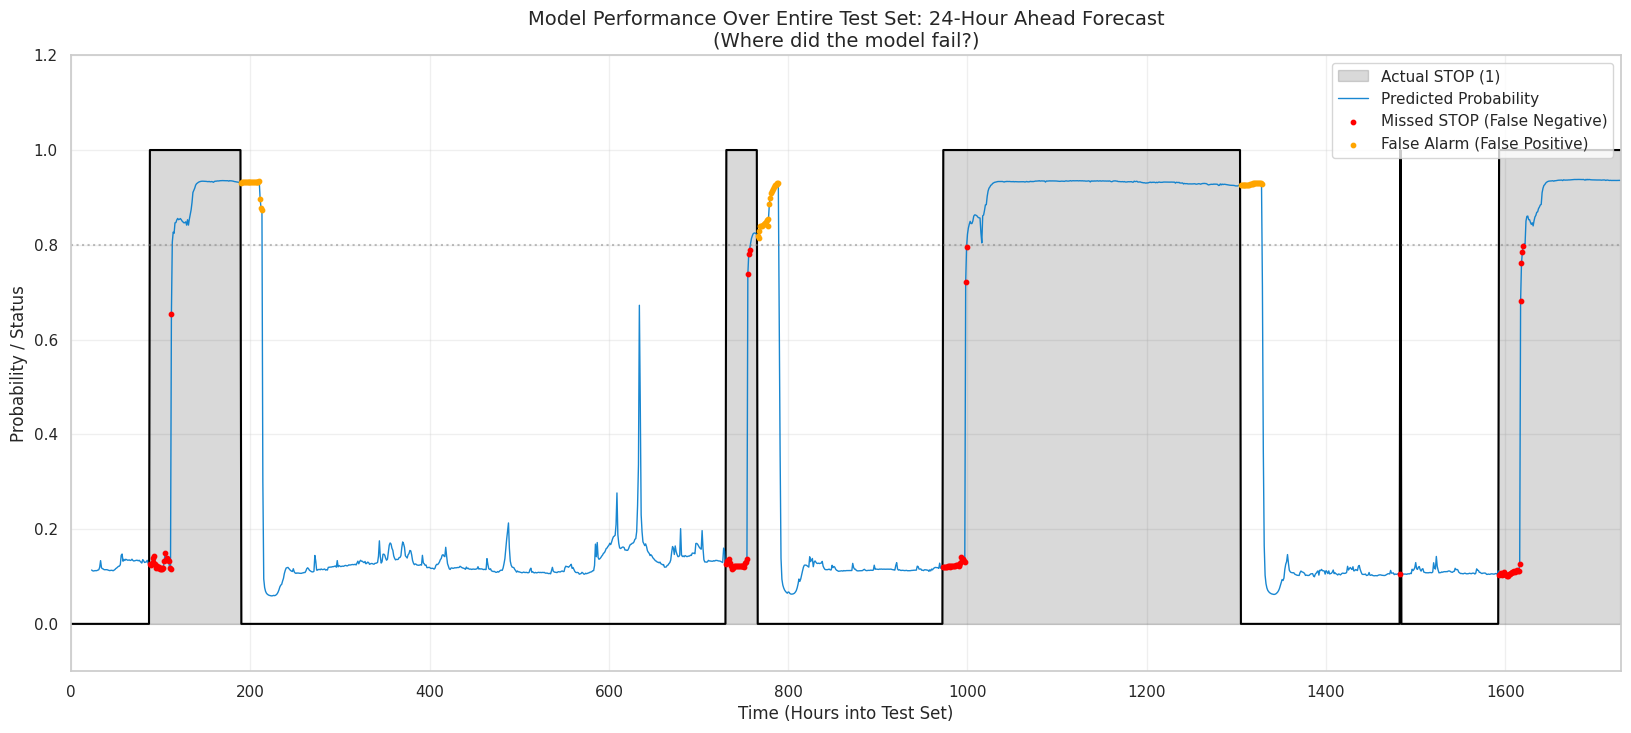

In [31]:
def plot_full_timeline_performance(actual, pred, title_suffix=""):
    plt.figure(figsize=(20, 8))
    
    # 1. Plot Actual Status (Black Line)
    # We fill the area under the curve for better visibility of STOP events
    plt.fill_between(range(len(actual)), actual, color='black', alpha=0.15, label='Actual STOP (1)')
    plt.plot(actual, color='black', linewidth=1.5)
    
    # 2. Plot Predicted Probability (Blue Line)
    plt.plot(pred, color='#007acc', linewidth=1, alpha=0.9, label='Predicted Probability')
    
    # 3. Highlight Errors
    # Create boolean masks for errors
    threshold = 0.8
    binary_pred = (pred > threshold).astype(int)
    
    # False Negatives (Missed Stops): Actual=1, Pred=0
    missed_mask = (actual == 1) & (binary_pred == 0)
    # False Positives (False Alarms): Actual=0, Pred=1
    false_alarm_mask = (actual == 0) & (binary_pred == 1)

    # We use scatter points to highlight specific hours of failure
    if np.any(missed_mask):
        plt.scatter(np.where(missed_mask)[0], pred[missed_mask], 
                    color='red', s=10, label='Missed STOP (False Negative)', zorder=5)
        
    if np.any(false_alarm_mask):
        plt.scatter(np.where(false_alarm_mask)[0], pred[false_alarm_mask], 
                    color='orange', s=10, label='False Alarm (False Positive)', zorder=5)

    # Add Threshold Line
    plt.axhline(y=0.8, color='gray', linestyle=':', alpha=0.5)
    
    plt.title(f'Model Performance Over Entire Test Set: {title_suffix}\n(Where did the model fail?)', fontsize=14)
    plt.xlabel('Time (Hours into Test Set)')
    plt.ylabel('Probability / Status')
    plt.legend(loc='upper right', frameon=True)
    plt.xlim(0, len(actual))
    plt.ylim(-0.1, 1.2)
    plt.grid(True, alpha=0.3)
    plt.show()

# --- Plot 1: How well does it predict the IMMEDIATE next hour? ---
plot_full_timeline_performance(actual_timeline, pred_timeline_1h, title_suffix="1-Hour Ahead Forecast")

# --- Plot 2: How well does it predict 24 HOURS in advance? ---
# (Note: NaN values at the start are ignored)
plot_full_timeline_performance(actual_timeline, pred_timeline_24h, title_suffix="24-Hour Ahead Forecast")

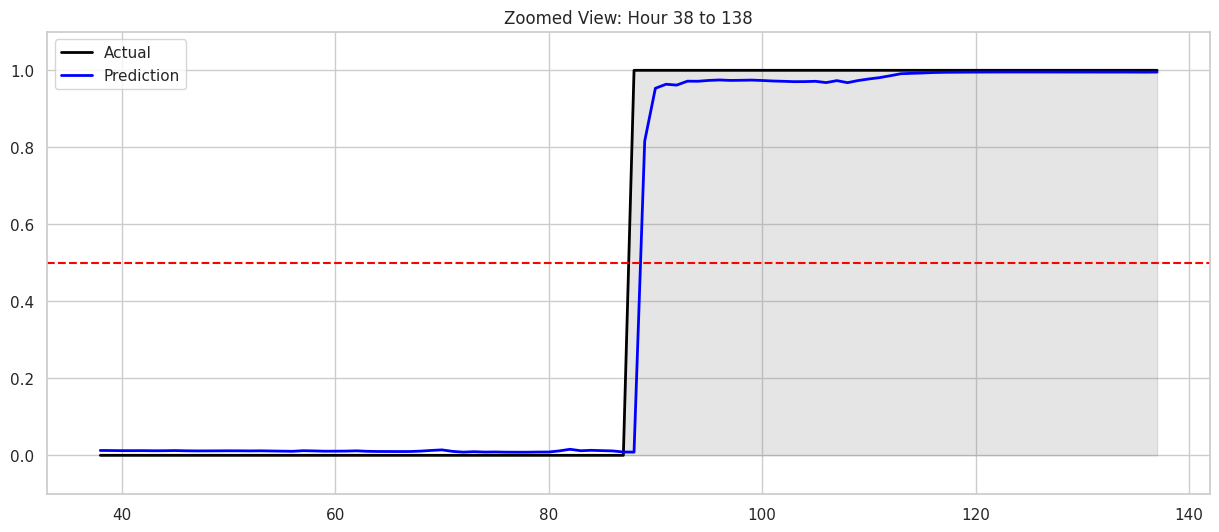

In [32]:
def plot_zoomed_segment(start_hour, end_hour, actual, pred):
    # Clip indices
    start_hour = max(0, start_hour)
    end_hour = min(len(actual), end_hour)
    
    segment_actual = actual[start_hour:end_hour]
    segment_pred = pred[start_hour:end_hour]
    
    plt.figure(figsize=(15, 6))
    plt.plot(range(start_hour, end_hour), segment_actual, color='black', label='Actual', linewidth=2)
    plt.plot(range(start_hour, end_hour), segment_pred, color='blue', label='Prediction', linewidth=2)
    
    plt.axhline(0.5, color='red', linestyle='--')
    plt.fill_between(range(start_hour, end_hour), segment_actual, color='gray', alpha=0.2)
    
    plt.title(f'Zoomed View: Hour {start_hour} to {end_hour}')
    plt.ylim(-0.1, 1.1)
    plt.legend()
    plt.grid(True)
    plt.show()

# Example: Find the first failure and zoom in on it
failures = np.where(actual_timeline == 1)[0]
if len(failures) > 0:
    first_failure = failures[0]
    # Show 100 hours before and after the first failure
    plot_zoomed_segment(first_failure - 50, first_failure + 50, actual_timeline, pred_timeline_1h)
else:
    print("No failures in test set to zoom in on.")

--- Processing Pump A (Test Set Shape: (1729, 72)) ---


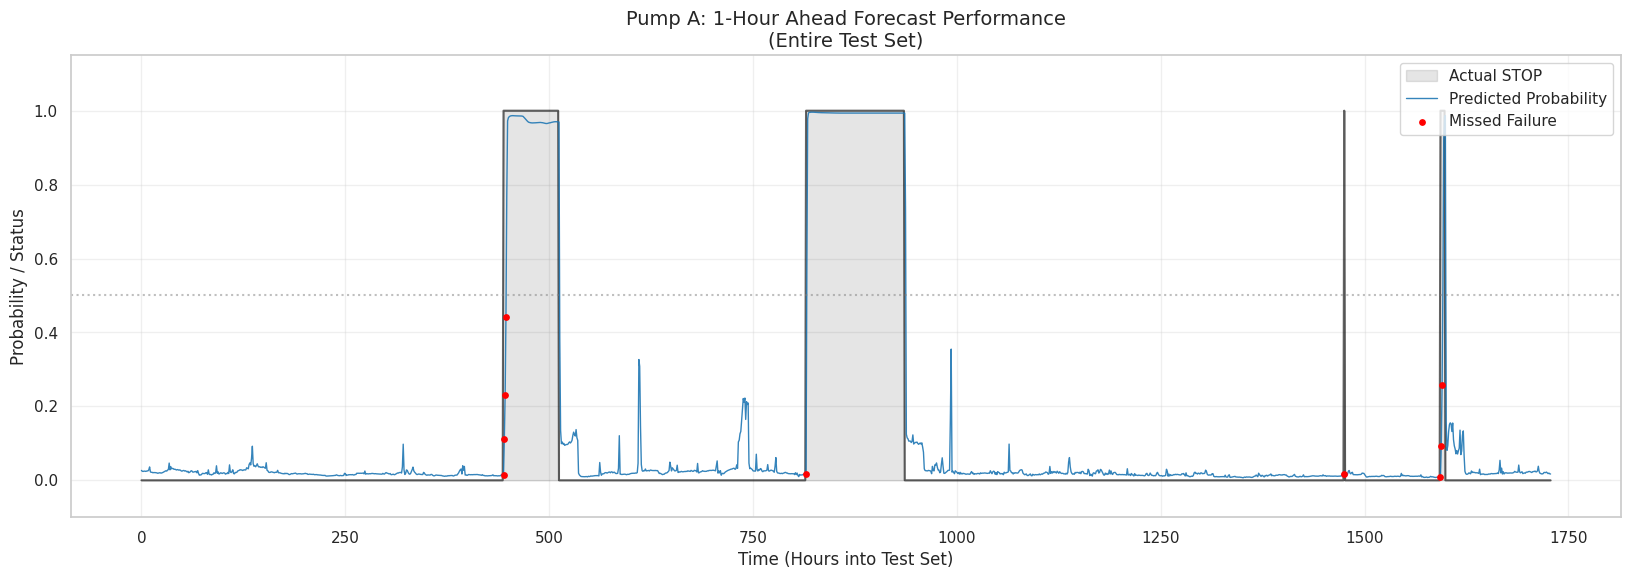

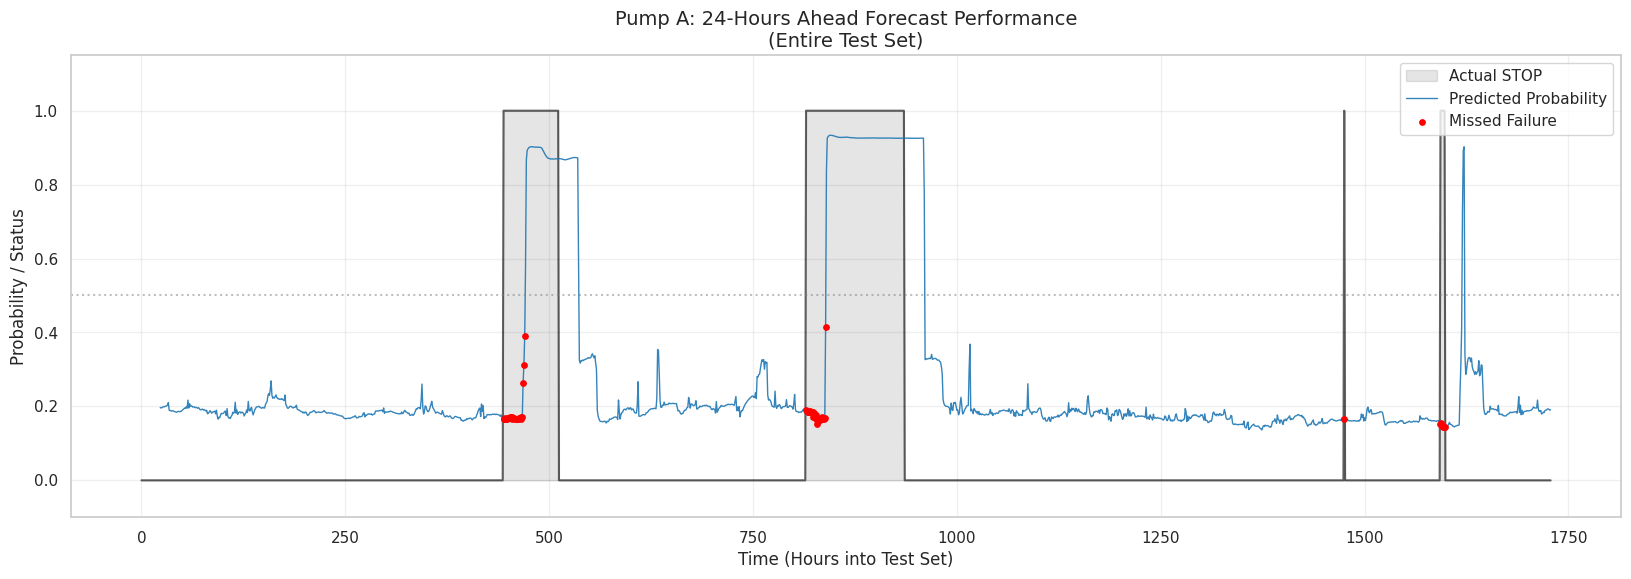

--- Processing Pump B (Test Set Shape: (1729, 72)) ---


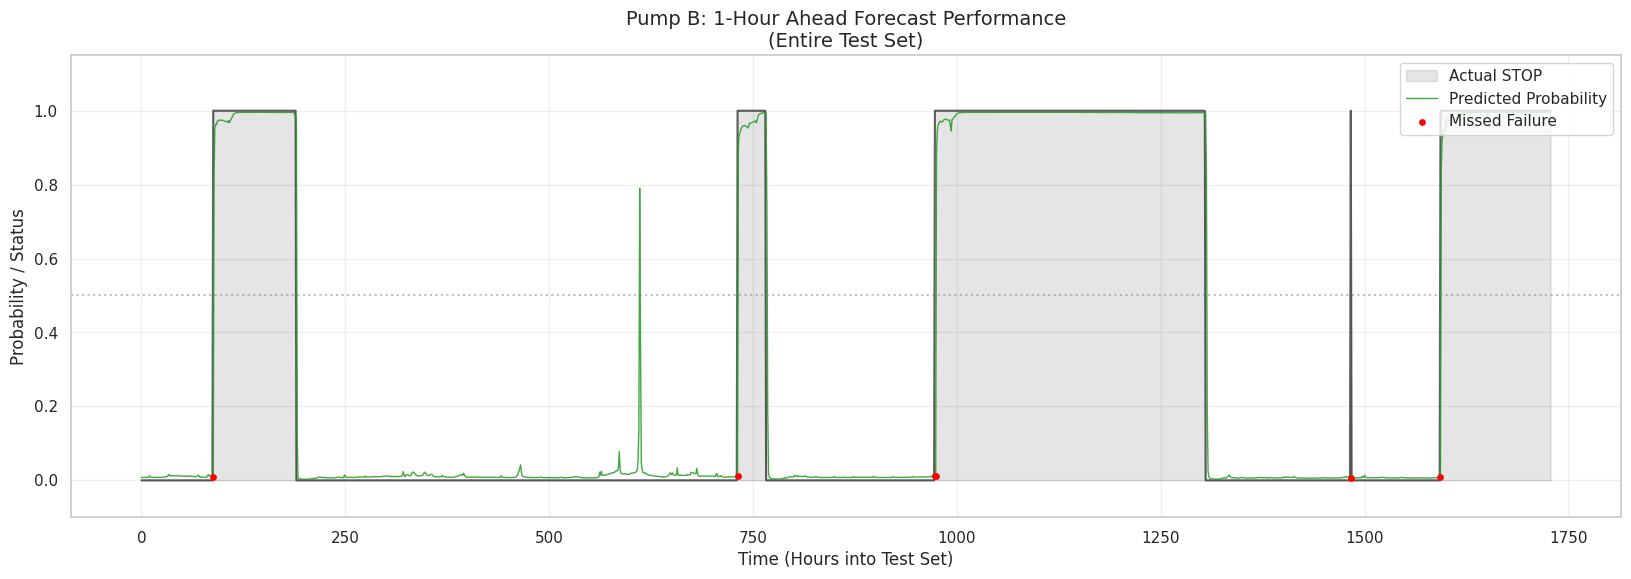

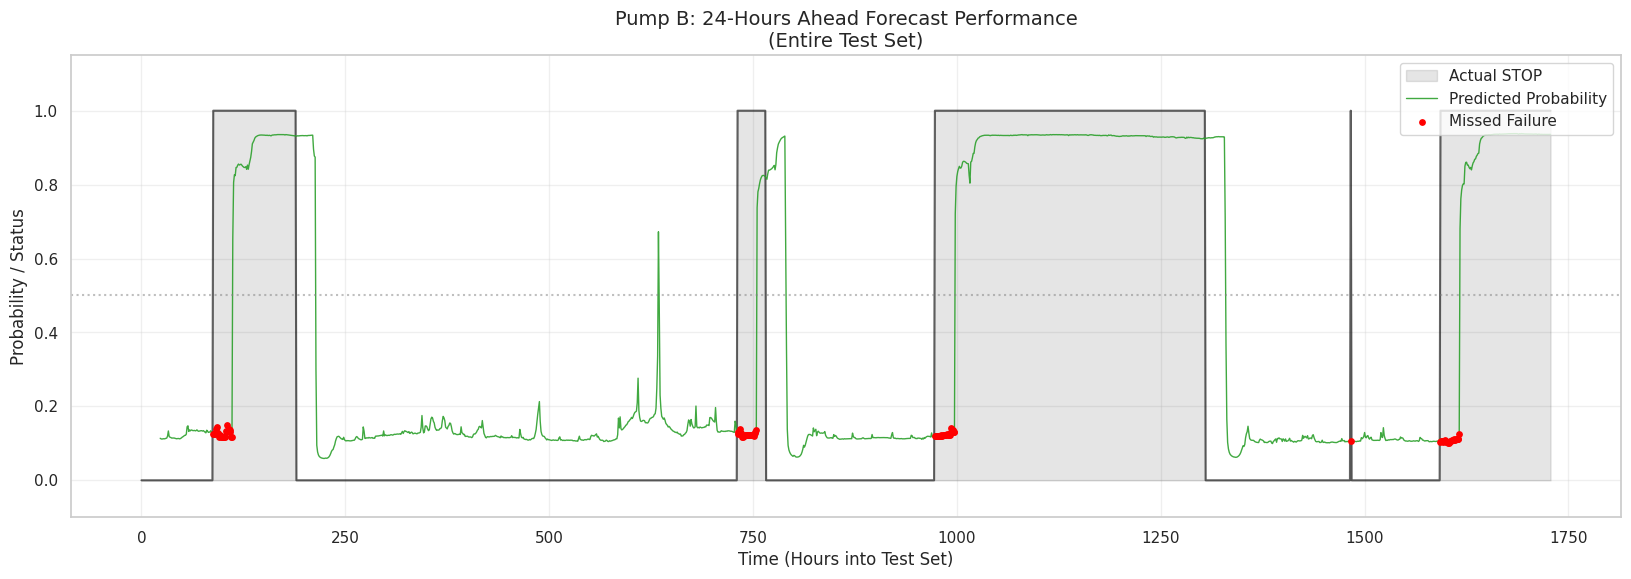

In [33]:
import matplotlib.pyplot as plt
import numpy as np

def plot_full_timeline(actual, pred, pump_name, horizon_label):
    """
    Plots the entire test set timeline for a specific Pump and Prediction Horizon.
    """
    plt.figure(figsize=(20, 6))
    
    # 1. Plot Actual Status (Black Line & Gray Fill)
    plt.fill_between(range(len(actual)), actual, color='black', alpha=0.1, label='Actual STOP')
    plt.plot(actual, color='black', linewidth=1.5, alpha=0.6)
    
    # 2. Plot Predicted Probability (Color depends on Pump)
    color = 'tab:blue' if 'A' in pump_name else 'tab:green'
    plt.plot(pred, color=color, linewidth=1, alpha=0.9, label='Predicted Probability')
    
    # 3. Highlight Missed Stops (False Negatives)
    # Where Actual is 1 (STOP) but Model predicts < 0.5 (RUN)
    missed = (actual == 1) & (pred < 0.5)
    if np.any(missed):
        plt.scatter(np.where(missed)[0], pred[missed], color='red', s=15, label='Missed Failure', zorder=5)

    # 4. Formatting
    plt.axhline(y=0.5, color='gray', linestyle=':', alpha=0.5)
    plt.title(f'{pump_name}: {horizon_label} Forecast Performance\n(Entire Test Set)', fontsize=14)
    plt.xlabel('Time (Hours into Test Set)')
    plt.ylabel('Probability / Status')
    plt.legend(loc='upper right')
    plt.ylim(-0.1, 1.15)
    plt.grid(True, alpha=0.3)
    plt.show()

def process_and_plot_pump(pred_list, target_list, pump_name):
    """
    1. Concatenates the batches (Fixes the shape error).
    2. Extracts 1-hour ahead and 24-hour ahead predictions.
    3. Plots them.
    """
    # 1. Fix Shapes using Concatenate
    y_pred_mat = np.concatenate(pred_list, axis=0)
    y_true_mat = np.concatenate(target_list, axis=0)
    
    print(f"--- Processing {pump_name} (Test Set Shape: {y_true_mat.shape}) ---")

    # 2. Extract Timelines
    # Column 0 = The prediction for the very next hour (t+1)
    actual_timeline = y_true_mat[:, 0] 
    pred_1h = y_pred_mat[:, 0]
    
    # Column 23 = The prediction for 24 hours later (t+24)
    # We shift it so it aligns visually with the event time
    pred_24h = np.full_like(actual_timeline, np.nan, dtype=float)
    if y_pred_mat.shape[1] >= 24:
        pred_24h[23:] = y_pred_mat[:-23, 23]

    # 3. Generate Plots
    # Plot 1: Short Term (1 Hour Ahead)
    plot_full_timeline(actual_timeline, pred_1h, pump_name, "1-Hour Ahead")
    
    # Plot 2: Long Term (24 Hours Ahead)
    # Good for seeing if the model detects issues in advance
    plot_full_timeline(actual_timeline, pred_24h, pump_name, "24-Hours Ahead")


process_and_plot_pump(all_preds_proba_a, all_targets_a, "Pump A")

process_and_plot_pump(all_preds_proba_b, all_targets_b, "Pump B")